# Introduction

My project is exploring the topic of house construction, house sale prices, and the price of commodities in the United States. I will use this project to determine whether it would be beneficial to purchase a house now, build a house now, or wait. I had hoped that this project would demonstrate the recessions over the past fifty years, including the recessions during the terms of Presidents Nixon, Ford, Carter, Reagan, Bush 41, Bush 43, Obama, and most recently the COVID-19 recession during President Trump and Biden's terms, and the effects that those recessions had with regard to the housing market. I have obtained nominal data to build a house from the United States Census Bureau, in a monthly form using their Excel spreadsheet export function. This data can be obtained publicly at https://www.census.gov/construction/cpi/.

I will be comparing the price to build and purchase a home to material costs, such as lumber, iron and steel, and glass, which I have obtained from several sources online, including FRED and https://www.macrotrends.net/futures/lumber. These files will all be available on my GitHub page, which is located at www.GitHub.com/JacobPeterson7. 

Within this project I will be looking at material costs, using the regular materials that it takes to build a home. These will be gotten from various sources, but I will mostly be utilizing FRED to gather this data. 

Comparing the data of house construction prices to material costs will be a good way to predict the price to build houses in the future, as well as predicting the price of materials in the future. Later on in my project, I will compare house construction prices to T Bills to compare the price of building a home to the rate of inflation, or the rate at which the price of the dollar changes, which at the time of writing this, it is likely to be high from what I have heard in the news and other sources. 

# Comparing Price of Building a home to Price of Purchasing a home

Firstly, we will look at the price to build a home across the United States. These prices are nominal, and obtained from the United States Census Bureau. These are a good indicator of the average price to build a home because it takes into account CPI and the price index of building a house across the United States.

In [1]:
import pandas as pd
project_data=pd.read_csv('build_data.csv', index_col = 'Date')

In [2]:
x = 2021 - 1973
DecMinJan = 12 - 1
MonthsInYear = 12

Current_Month = (x * MonthsInYear) + DecMinJan

print(Current_Month)

587


We can see from the formula above that December of 2021 would be month 587 in the data. However, we only have data going up to August of 2021, or 582 months of data. This is okay, as prices are unlikely to change more than a marginal amount over a five month period from when I started looking at this project to today.

<ipython-input-3-a4e17f79c596>:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])


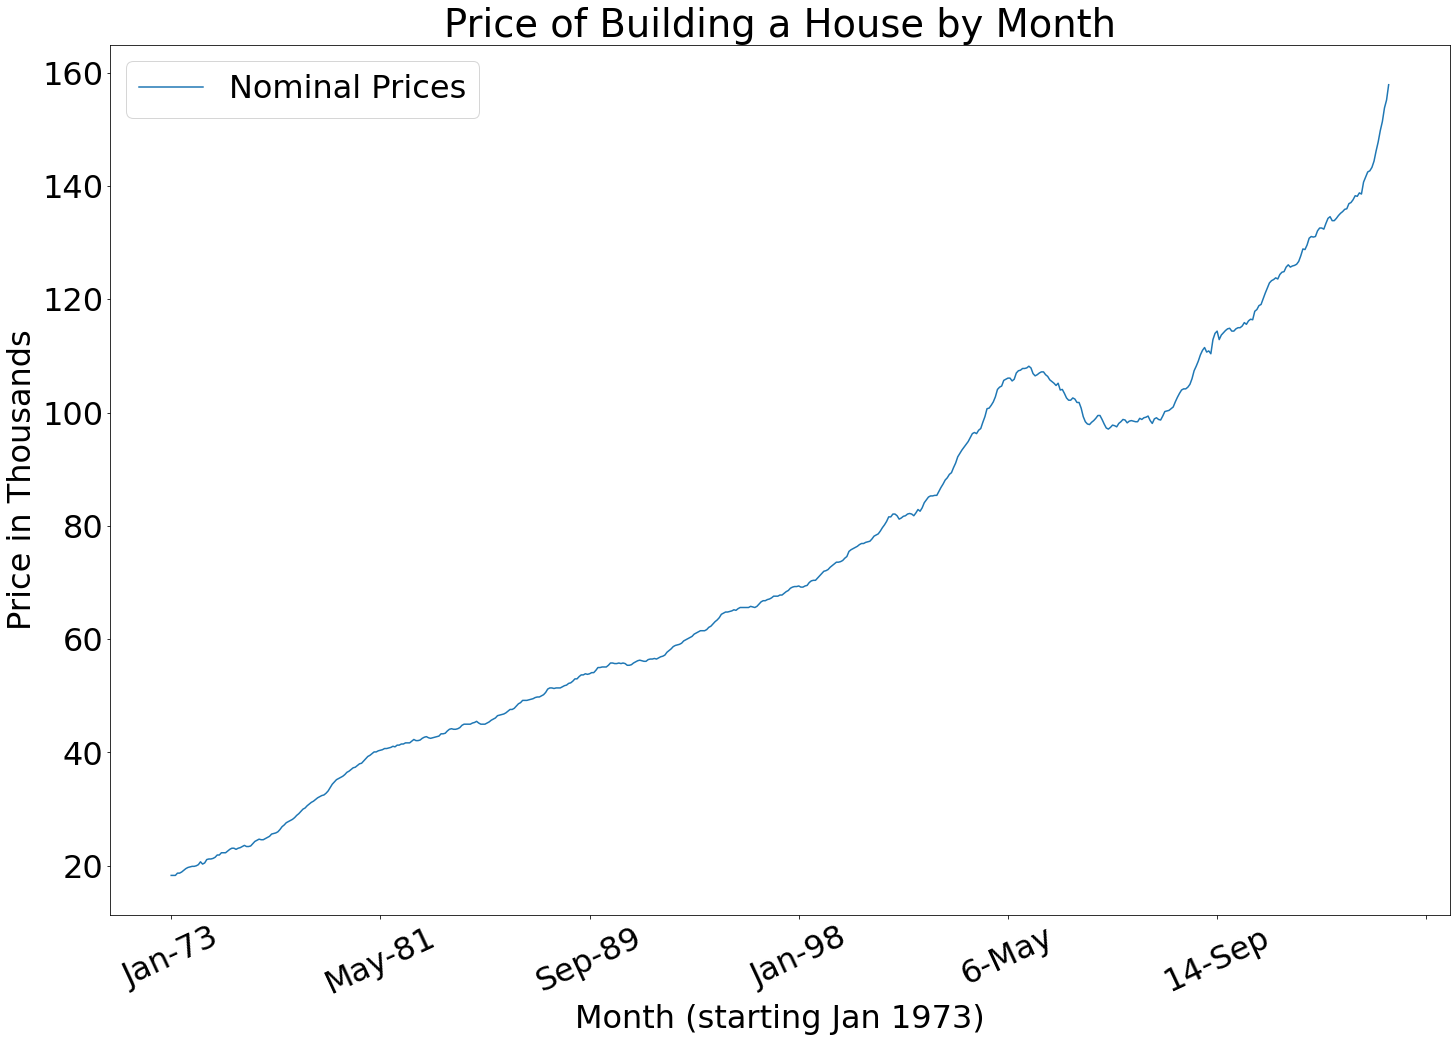

In [3]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
project_data.plot.line(ax = ax, legend = True)
y_vals = ax.get_yticks()
plt.xlabel('Month (starting Jan 1973)')
plt.xticks(rotation = 25)
plt.ylabel('Price in Thousands')
ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])    

plt.title("Price of Building a House by Month")
plt.show()
plt.close()

As we can see in the graph above, nominal prices start out relatively low in the beginning of our data in January of 1973. This is expected over time with the inflation that we have seen over the past fifty years. One thing that jumps out at me instantly about this graph is the fact that there is only one time where the price is decreased by a significant amount, and that is the 2006 and 2007 housing crisis, caused by the sale of Mortgage Backed Securities, and loan officers getting greedy and giving out more subprime loans than they should have. If you ever need a good movie to watch on the housing bubble, I'd recommend _The Big Short_ as it goes very in detail with the situation.

We should look at the rate of change of the price to build a home throughout this data. This will give us a better idea of the change of nominal prices over time, as it will demonstrate the change from month to month regarding the nominal prices.

In [4]:
housing_price_change_data = project_data.pct_change(12) * 100

<ipython-input-5-b401a6f07178>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])


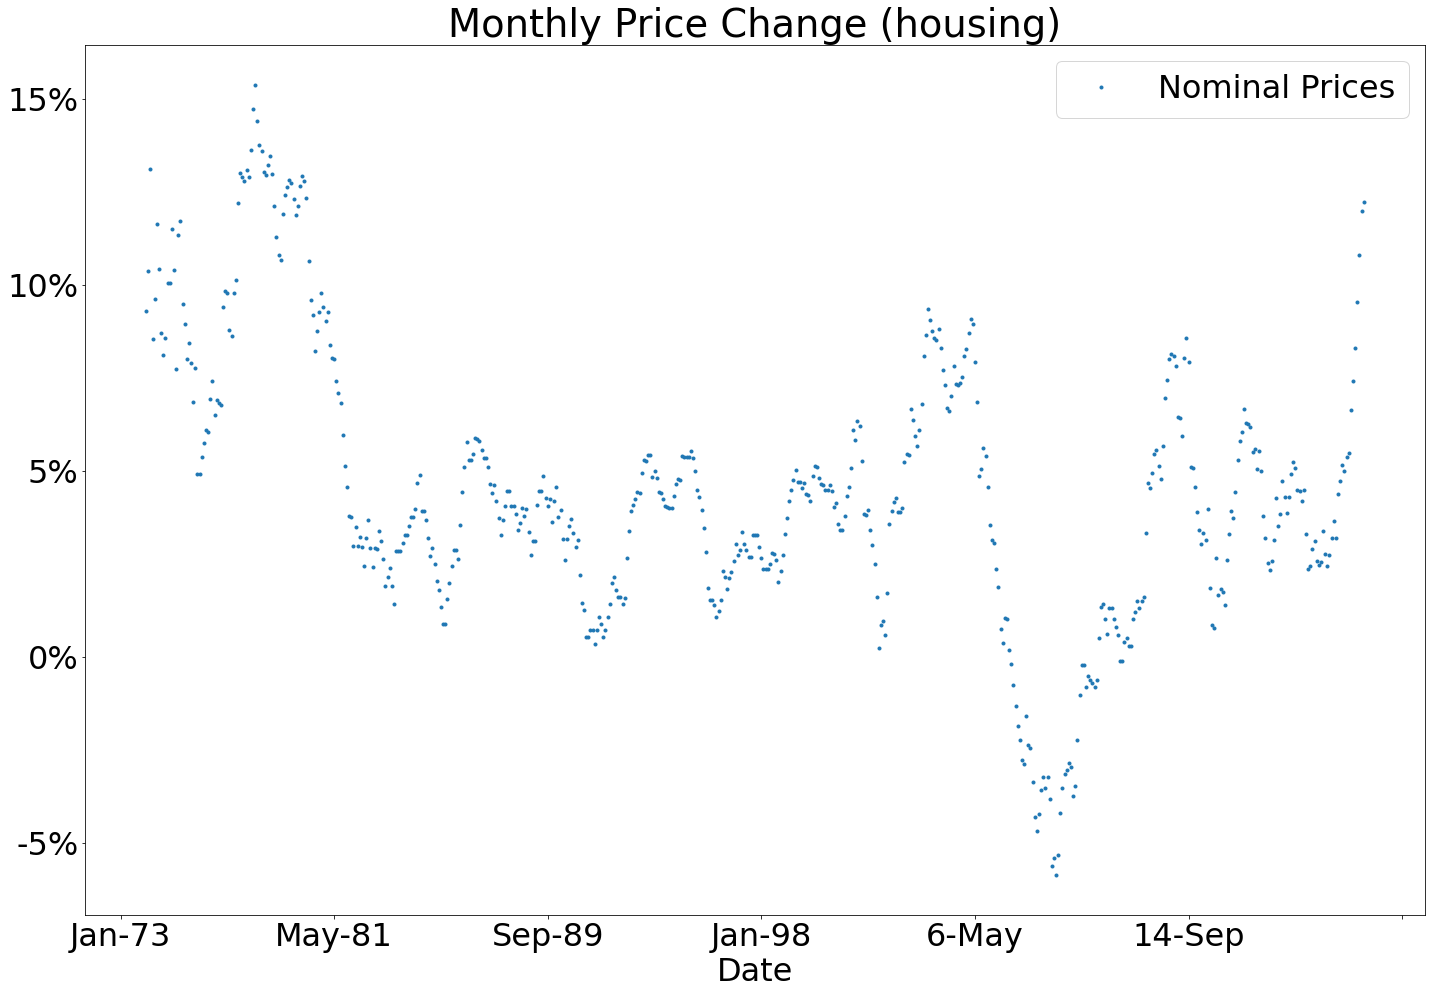

In [5]:
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
for key in housing_price_change_data:
    housing_price_change_data[key].plot.line(marker = ".", ls="", ax = ax)
plt.legend()
plt.title("Monthly Price Change (housing)")
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])    

plt.show()
plt.close()

We are able to visualize in this graph the percent change over time of the nominal prices for the construction of a home. The visualization tells us that the change in prices varies from month to month, which is expected. However, there are sometimes where the change is close to being zero percent. However, the price to construct a home usually increases in price, and only decreases every once in a while. We can also see on the graph that the price has been increasing steadily recently, increasing approximately 1.5% to 2% every month. The only time we see a very notable decrease in the price to construct a home is during the 2007 housing crisis. With the most recent data available, we can notice that we have not seen this rate of change in the price to build a home since the 1970's. 

Dr. Caton recommended that I look at the Case Shiller Index, which compares the housing market to the S & P 500. He recommended I do this because it would give a good idea of how the price to own a home has gone up as well as the price of the S & P 500. I was skeptical that this would be of use, so I did some research and found an article regarding why this could be a good barometer of the housing market.

According to an article written by Nikolaos Antonakakisa, Rangan Guptab, and Aviral K. Tiwar, 

"Stock prices are considered to be a leading indicator for economic activity of the U.S. economy (Stock and Watson, 2003; Rapach and Weber, 2004), and hence, determining what factors drive this market is of paramount importance. While stock prices are
primarily driven by financial variables (Valcarcel, 2012), the importance of macroeconomic variables cannot be ruled out either
(Goyal and Welch, 2008; Valcarcel, 2012; Rapach and Zhou, 2013). Inflation is undoubtedly one of the most important
macroeconomic variables believed to be related to stock prices, and in turn, also affected by it (Gupta and Inglesi-Lotz, 2012)."

This article can be read by opening "Inflation Article 2" in my GitHub.

This means that the Case Shiller Index is a good source of economic data when it comes to housing prices compared to the S & P 500, and in fact is considered to be a leading indicator. Because stock prices are the best indicator for economic activity of our economy, the Case Shiller Index should be considered to be very accurate when it comes to being an indicator of housing prices, S & P 500 prices, and economic wellbeing for the American People.

In [6]:
CaseShillerIndex = pd.read_csv('CaseShillerIndex.csv', index_col = 'DATE')

Unfortunately for us, the Case Shiller Index I got from FRED only goes back to 1987, whereas our lumber and housing data goes back to 1973. While this will still be an accurate representation of housing prices, especially with regards to the price of the S & P 500, we won't be able to go as far back as we'd like.

<ipython-input-7-829e4c47c476>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])


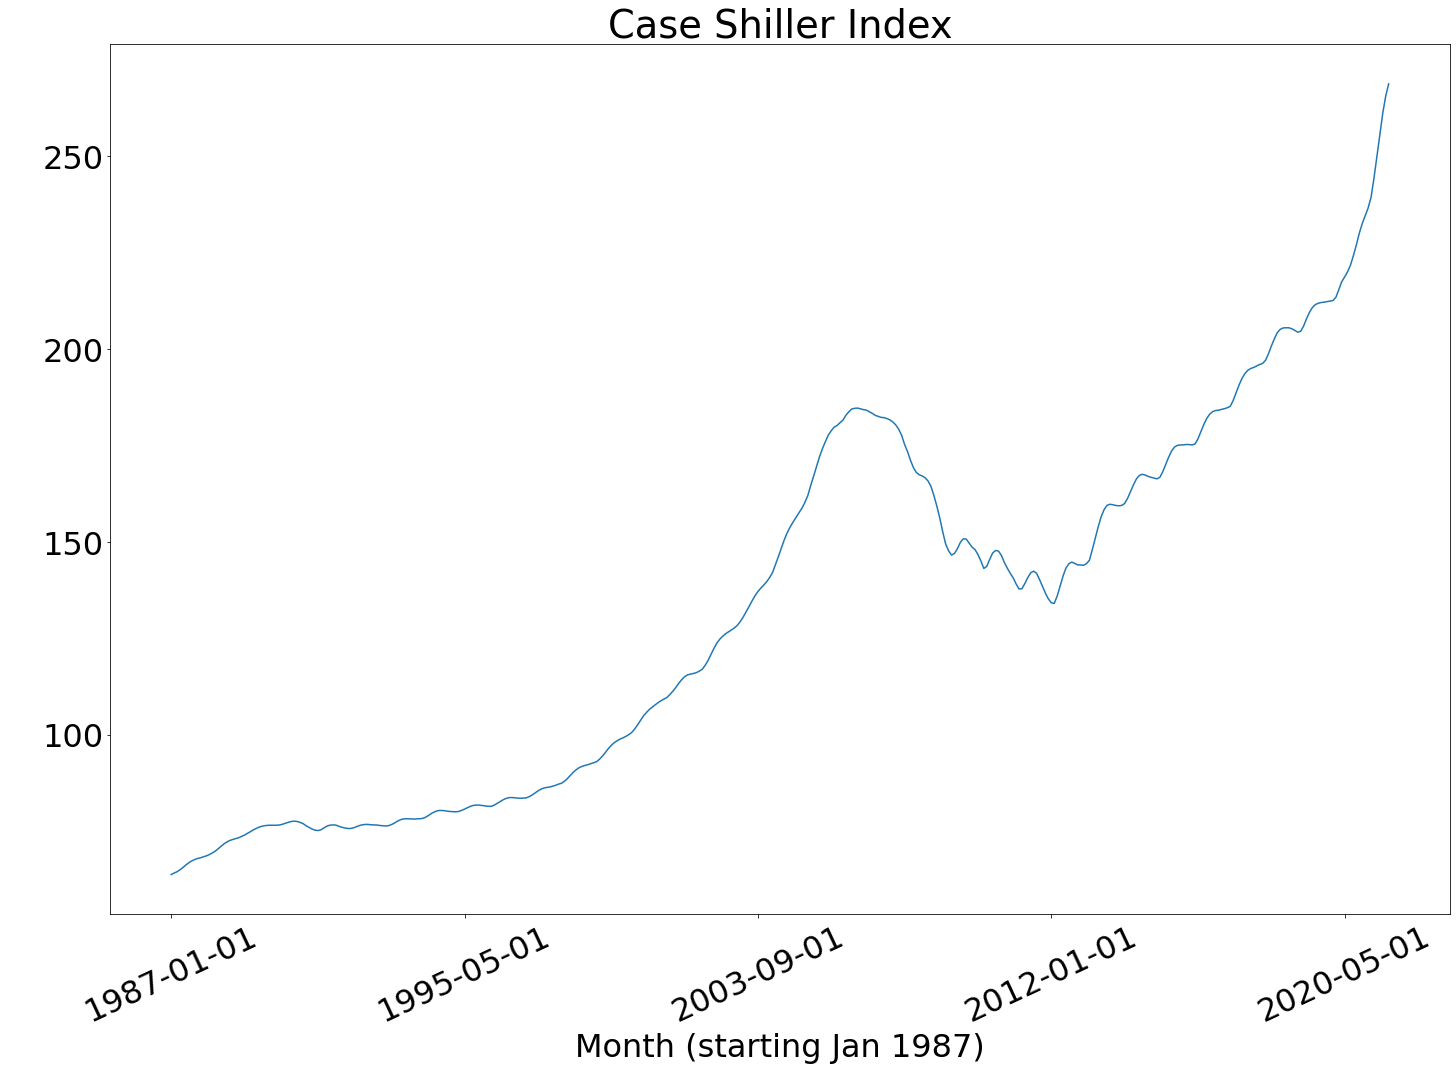

In [7]:
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
CaseShillerIndex.plot.line(ax = ax, legend = False)
y_vals = ax.get_yticks()
plt.xlabel('Month (starting Jan 1987)')
plt.xticks(rotation = 25)
plt.ylabel(' ')
ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])    

plt.title("Case Shiller Index")
plt.show()
plt.close()

Much like we saw with the price to build a home, home ownership prices have steadily increased since the beginning of our data. We also see a downward trend during the 2007 housing crisis. We will once again compute the rate of change, this time for the Case Shiller Index, and graph it.

<ipython-input-8-b887169e679e>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])


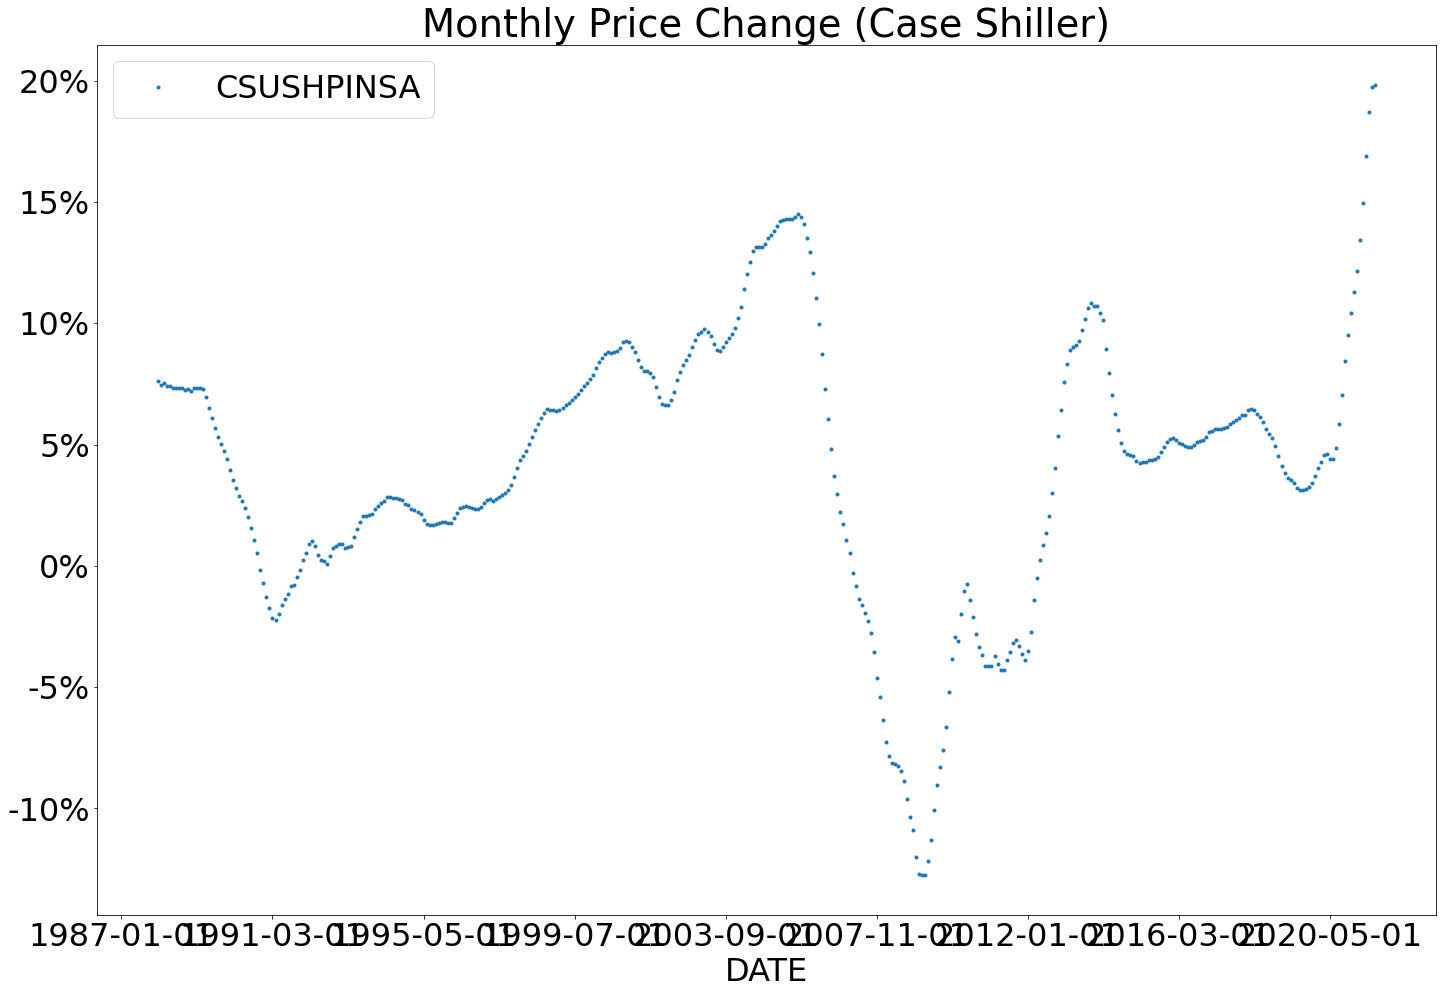

In [8]:
CaseShillerIndex_change_data = CaseShillerIndex.pct_change(12) * 100 

plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
for key in CaseShillerIndex_change_data:
    CaseShillerIndex_change_data[key].plot.line(marker = ".", ls="", ax = ax)
plt.legend()
plt.title("Monthly Price Change (Case Shiller)")
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])    

plt.show()
plt.close()

We see a lot of the same trends in the Case Shiller index that we do in the graph that depicts the price to build a home. One similar trend is the massive downward spiral of house ownership prices in the 2007 housing crisis. We also see that the price to own a home is on the rise, at levels that have never seen before and tracked via the Case Shiller index.

Another thing to look at is the amount of houses traded per month. As we know, for an asset to be more liquid it has to be bought and sold often, and the more it is bought and sold the more liquid it is. 

In [9]:
HousingSupplyData = pd.read_csv('Housing_Supply.csv', index_col = 'DATE')

<ipython-input-10-e2a59fefdbb7>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])


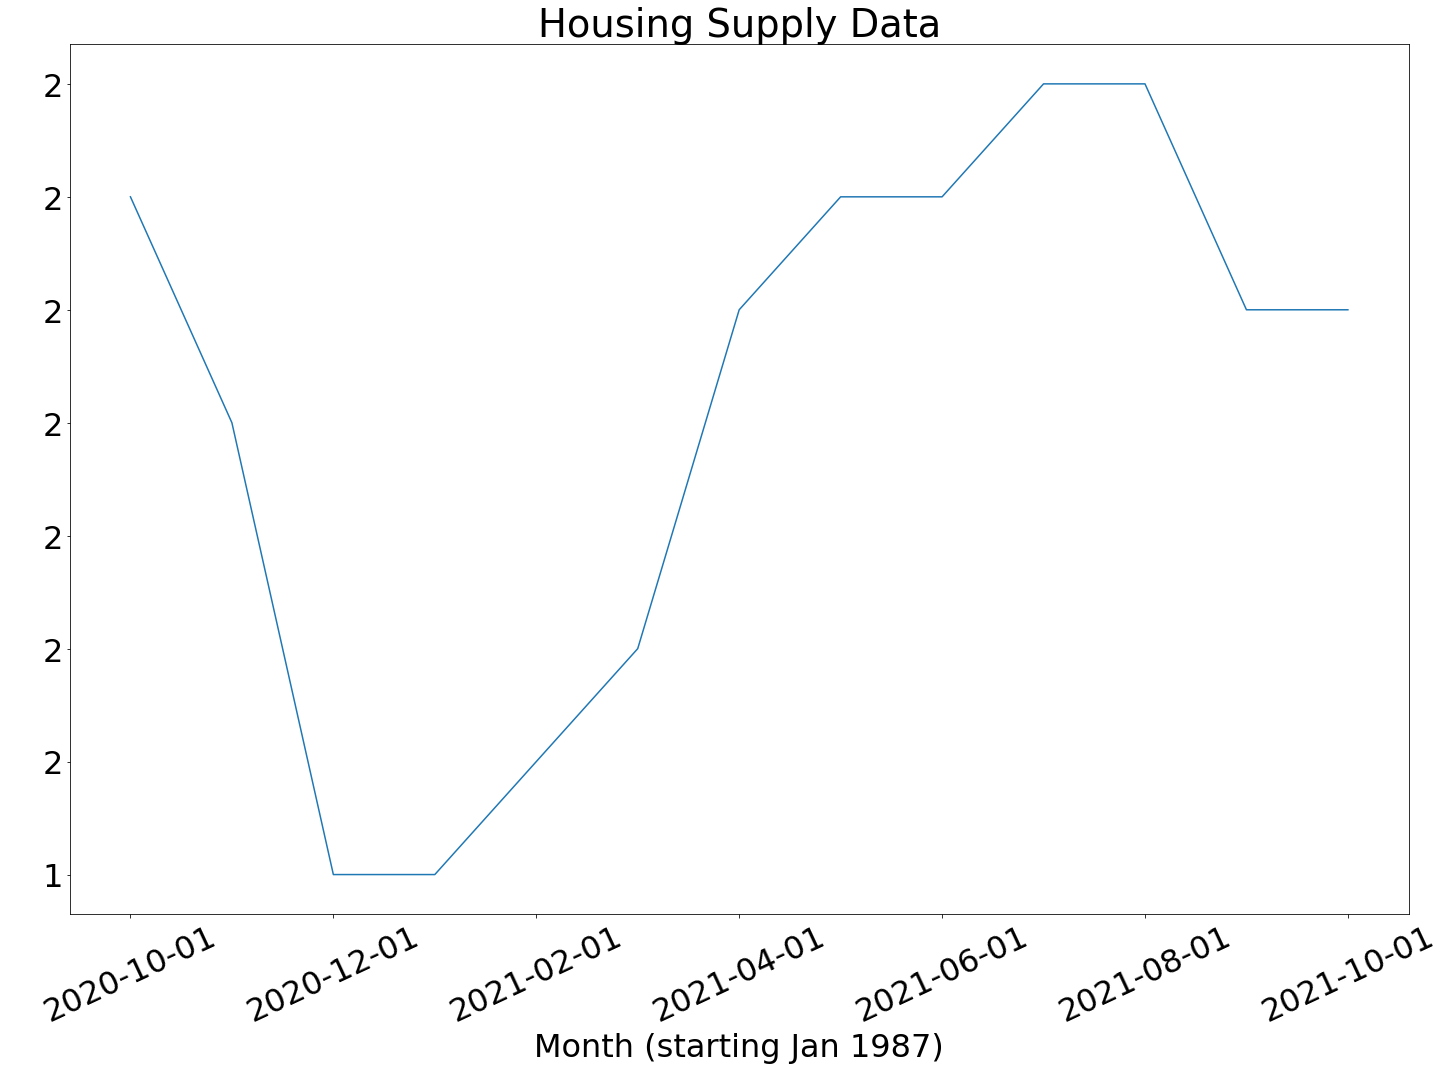

In [10]:
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
HousingSupplyData.plot.line(ax = ax, legend = False)
y_vals = ax.get_yticks()
plt.xlabel('Month (starting Jan 1987)')
plt.xticks(rotation = 25)
plt.ylabel(' ')
ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])    

plt.title("Housing Supply Data")
plt.show()
plt.close()

We can see in this graph that in October of 2020, houses were being bought and sold a lot. However, in December of 2020, houses were relatively not liquid, as people were not trading their houses. Then, in January of 2021, trading of houses picked up again. We saw this rise until around September of 2021 when there was a sharp drop. Let's look at the rate of change for this data.

<ipython-input-11-6be9ea685a0f>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])


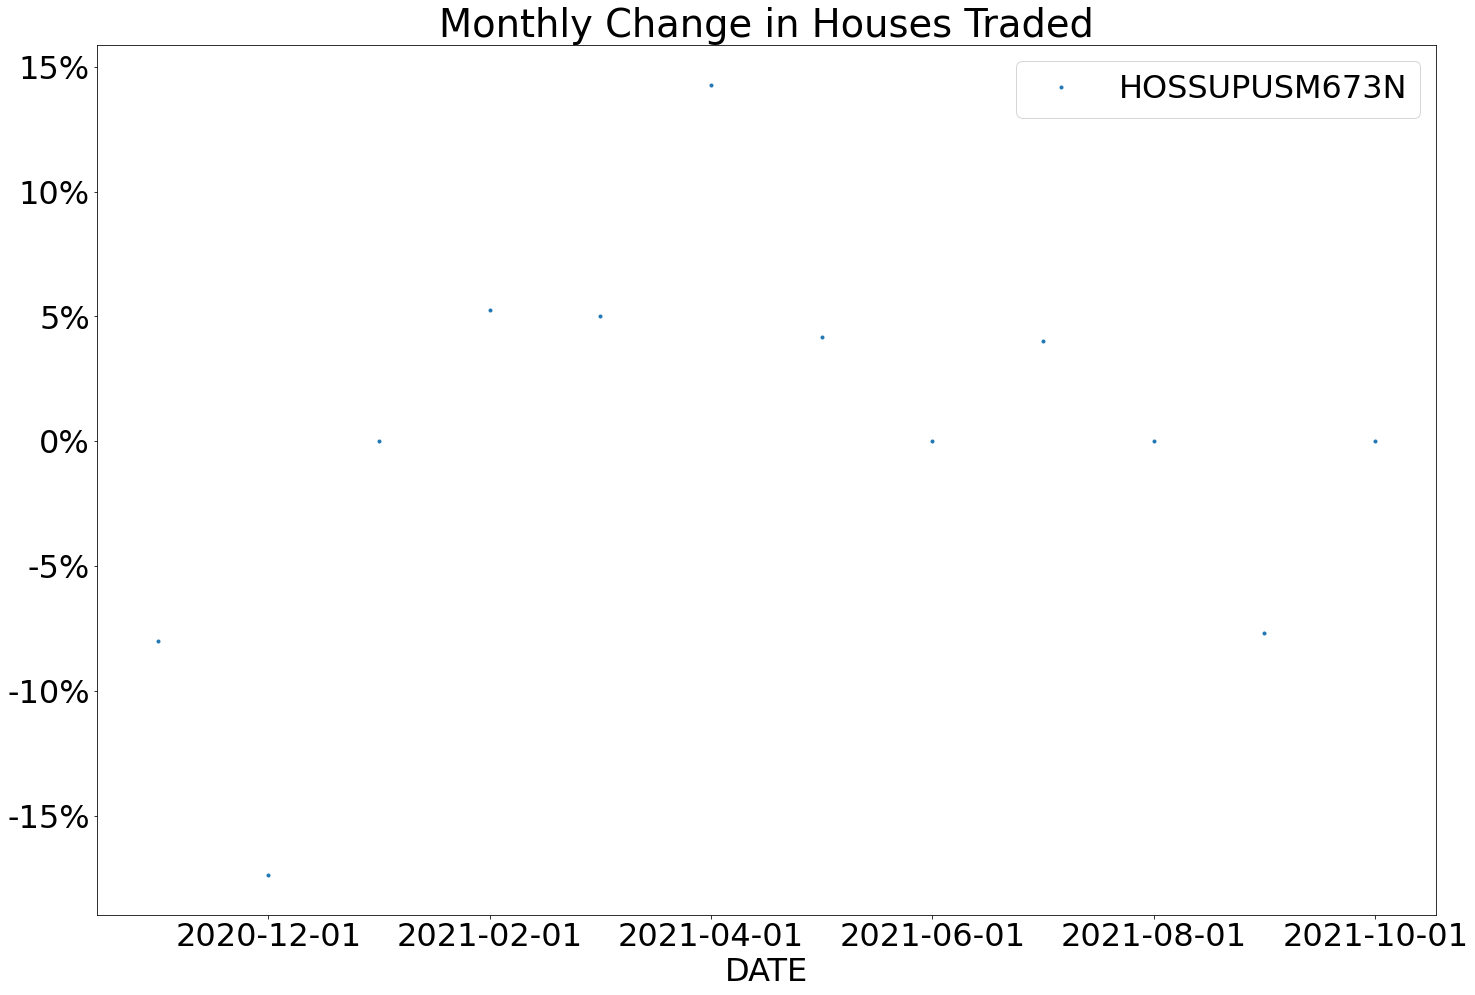

In [11]:
HousingSupply_change_data = HousingSupplyData.pct_change() * 100 

plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
for key in HousingSupply_change_data:
    HousingSupply_change_data[key].plot.line(marker = ".", ls="", ax = ax)
plt.legend()
plt.title("Monthly Change in Houses Traded")
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])    

plt.show()
plt.close()

Unfortunately we don't have that many data points to go off of with the trading of houses. However, we can see that in December of 2020 there was over a 15% decrease in the trading of homes. Compare that to April of 2021 when there was over a 15% positive growth in the sale of homes. Since 2021 started, the number of homes sold has only decreased one time; all other months has been almost no change or positive change.

According to an article by Robert Hughes titled "New Single-Family Home Sales Remain Brisk but Inventories Rise as Prices Continue to Surge," October of 2021 was an extremely slow month for house sales' gain. This article can be read here: https://www.aier.org/article/new-single-family-home-sales-remain-brisk-but-inventories-rise-as-prices-continue-to-surge/.

Our data reflects this, as October of 2021 is just _barely_ above the 0% increase mark.

# Material Prices

The price to build and purchase a home has much to do with the materials used to construct it. That's why I wanted to look at the material prices of what goes into a home. While I don't have data on everything, I have picked lumber, glass, and iron and steel prices to look at and analyze. I chose these because these are some of the most common materials reported by news articles when it comes to material prices. We have seen many news articles about lumber in the past eight months, due to soaring prices. 

In [12]:
lumber_data=pd.read_csv('lumber_prices2.csv',index_col='Date')
IronSteelData = pd.read_csv('IronSteelData.csv', index_col = 'DATE')
GlassData = pd.read_csv('GlassData.csv', index_col = 'DATE')

<ipython-input-13-a1a377ecec31>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])


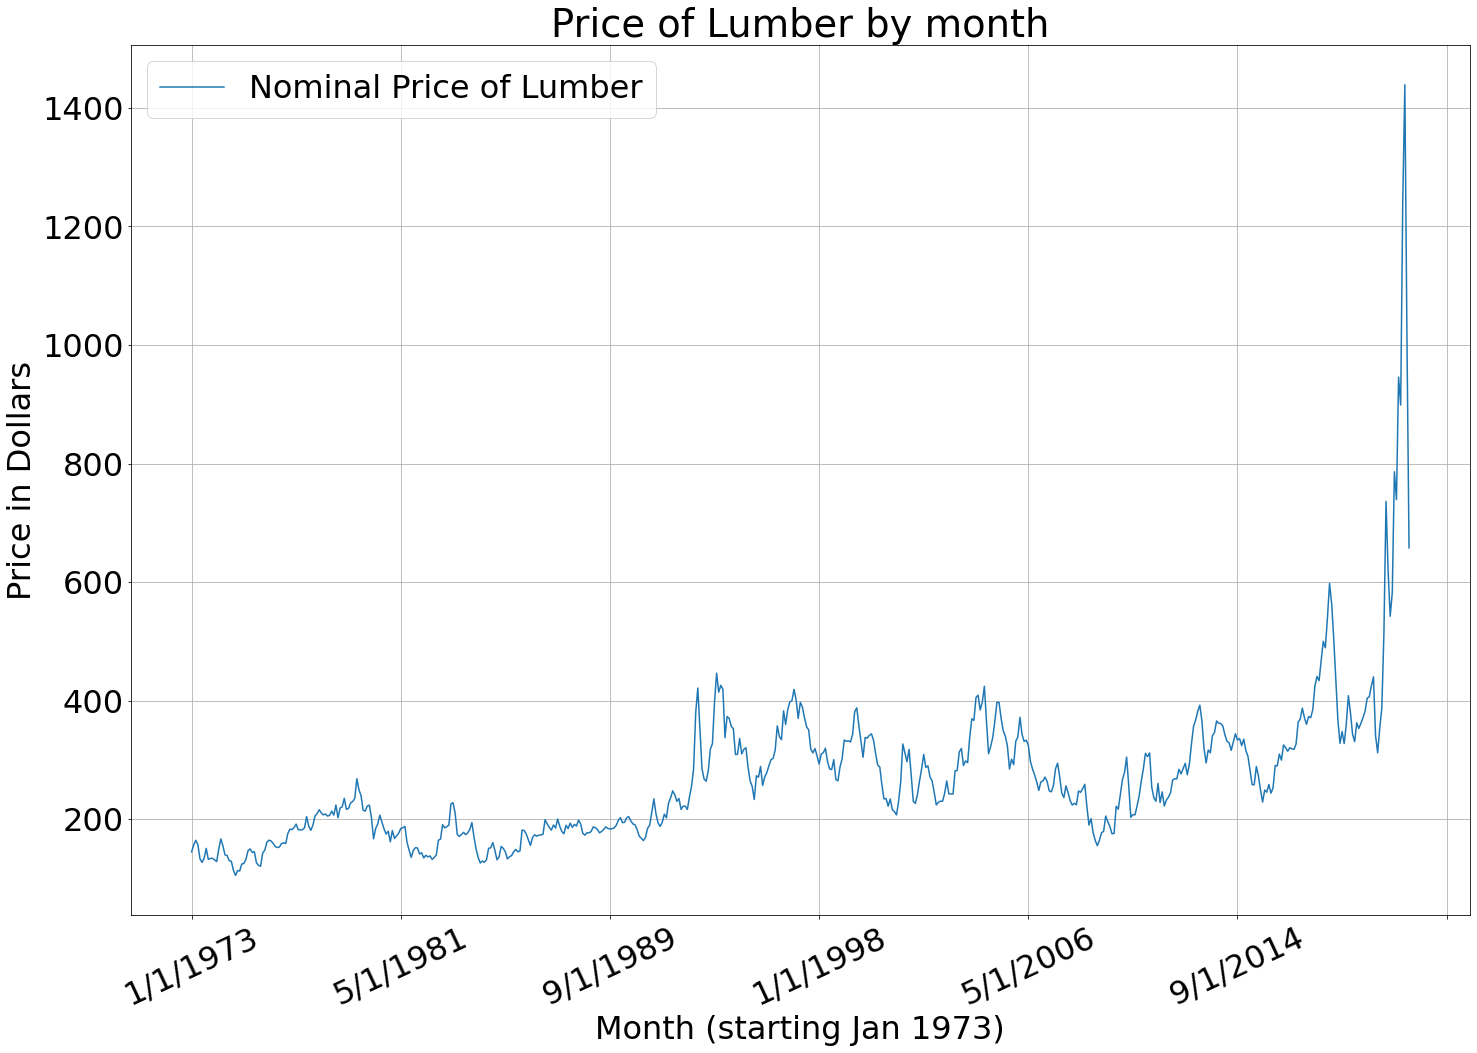

In [13]:
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
lumber_data.plot.line(ax = ax, legend = True)
y_vals = ax.get_yticks()
plt.xlabel('Month (starting Jan 1973)')
plt.xticks(rotation = 25)
plt.ylabel('Price in Dollars')
ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])  
plt.grid(True)

plt.title("Price of Lumber by month")
plt.show()
plt.close()

We can see in this graph that the price of lumber has been very jagged over the period of time that we have data for. However, we have also seen new record highs extremely recently, with the price of lumber hitting over 1400 dollars per unit of lumber. This is a record high as far back as we have data for, which is 1973. Let's calculate the percent change to see what that has looked like regarding our data.

<ipython-input-14-31754b3f5717>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])


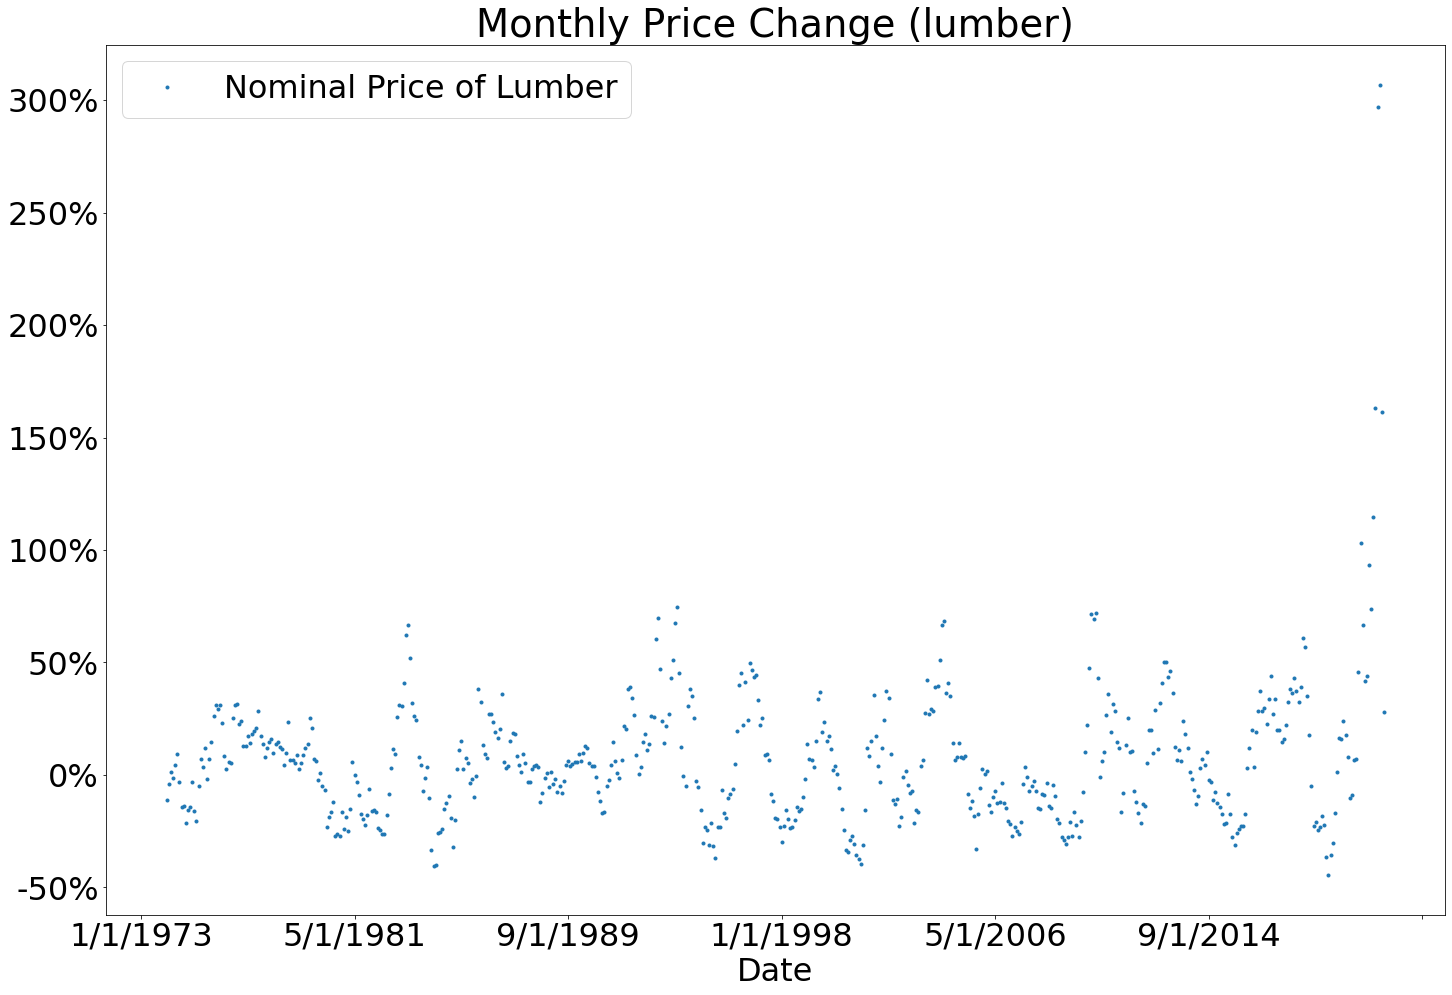

In [14]:
lumber_price_change_data = lumber_data.pct_change(12) * 100 

plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
for key in lumber_price_change_data:
    lumber_price_change_data[key].plot.line(marker = ".", ls="", ax = ax)
plt.legend()
plt.title("Monthly Price Change (lumber)")
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])    

plt.show()
plt.close()

We can see that the distribution for lumber prices in particular is very sporadic. Even in the 1980's, the price of lumber was fluctuating by over 50% per month in some cases. However, we can see that in recent months, we have had over a 300% increase in the price of lumber. This is likely due to supply chain shortages that we have seen across the United States and the world due to the SARS 2 Coronavirus pandemic. 

We will now look at iron and steel data.

<ipython-input-15-f75afc76ae1e>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])


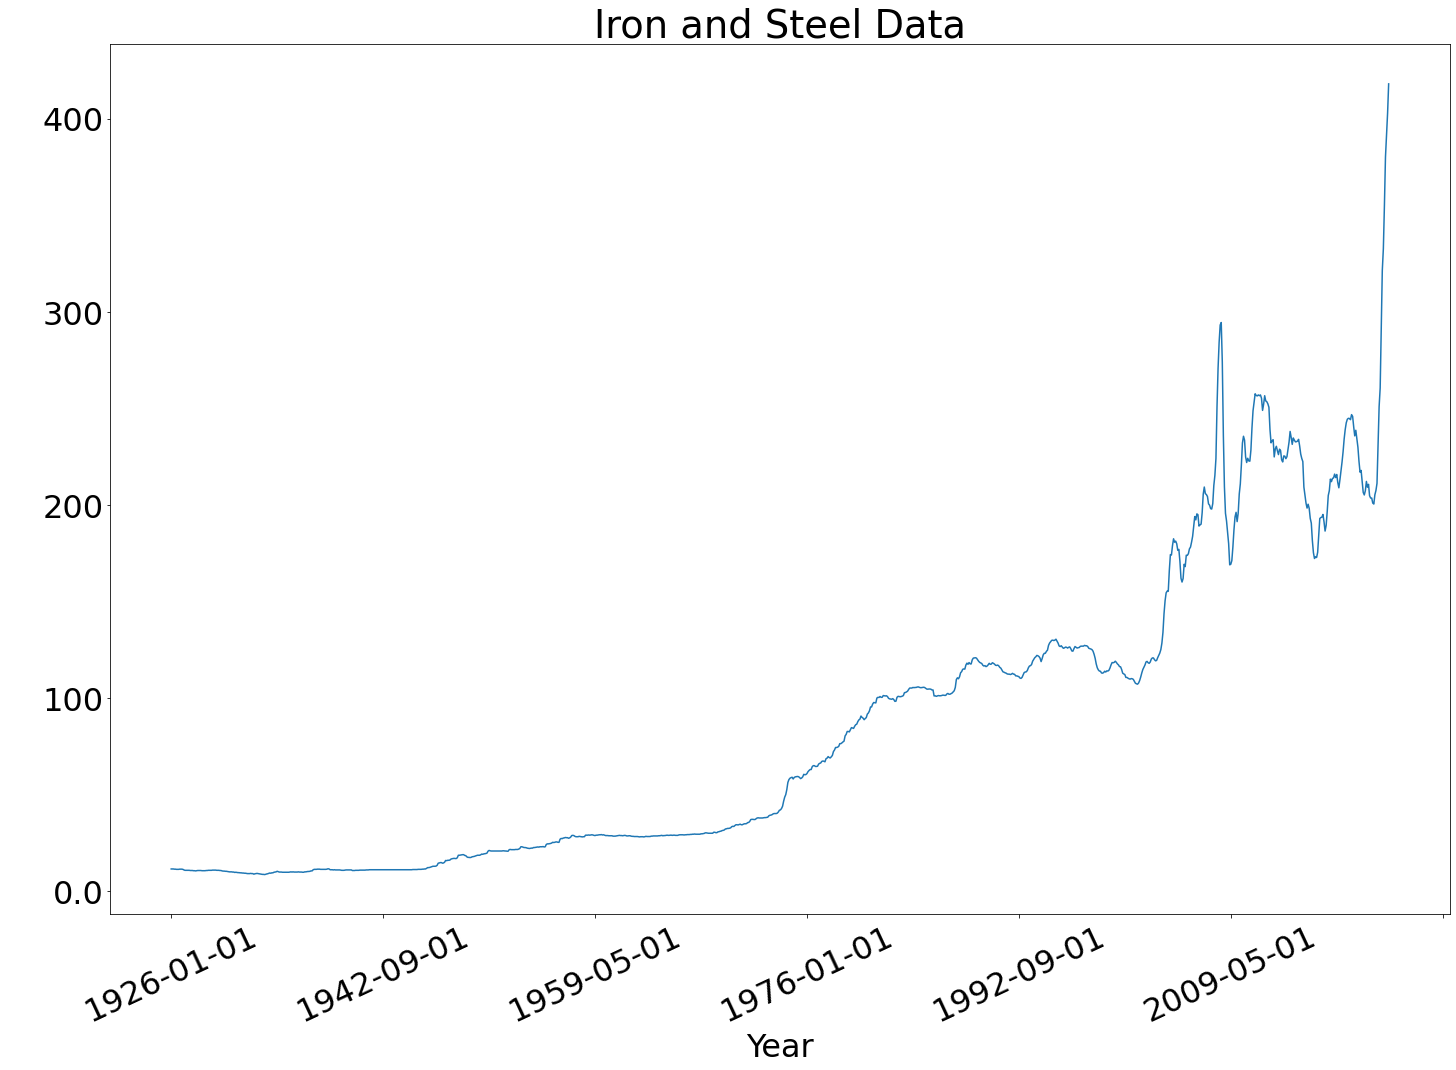

In [15]:
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
IronSteelData.plot.line(ax = ax, legend = False)
y_vals = ax.get_yticks()
plt.xlabel('Year')
plt.xticks(rotation = 25)
plt.ylabel(' ')
ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])    

plt.title("Iron and Steel Data")
plt.show()
plt.close()

Here we see much of the same as we did with lumber, except we have a much longer period of data to work with. Our iron and steel data starts in 1926, and ends in present day. One thing I find interesting about this graph is that around the 2007 crisis, prices increased drastically, and then came down. Let's look at the percent change to get a closer look at this.

<ipython-input-16-a0819043e43f>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])


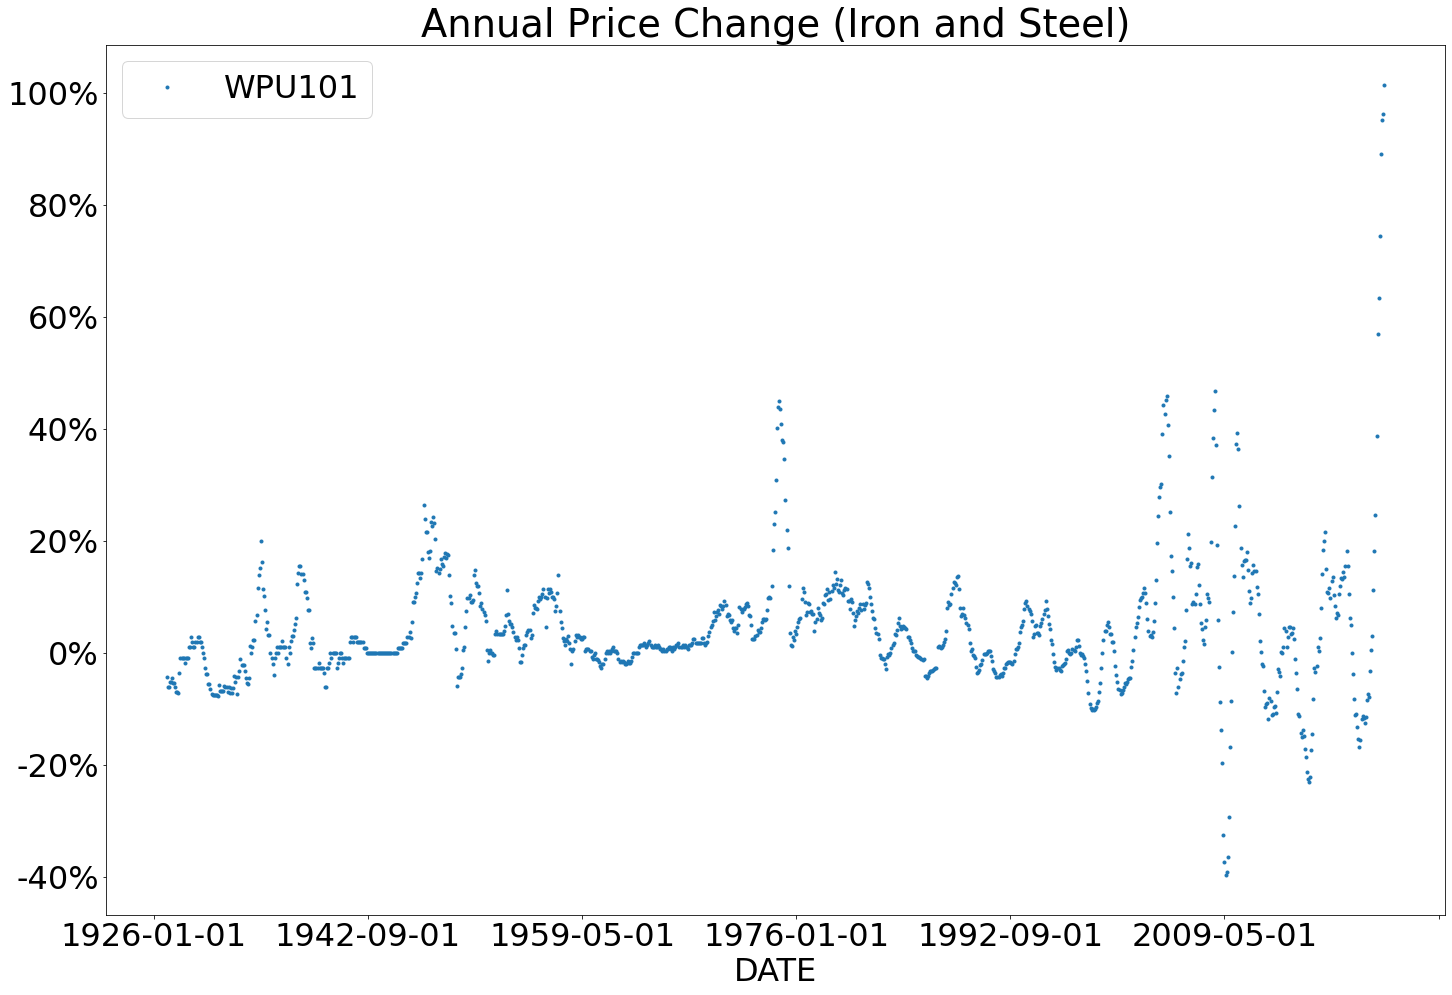

In [16]:
IronSteel_change_data = IronSteelData.pct_change(12) * 100 

plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
for key in IronSteel_change_data:
    IronSteel_change_data[key].plot.line(marker = ".", ls="", ax = ax)
plt.legend()
plt.title("Annual Price Change (Iron and Steel)")
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])    

plt.show()
plt.close()

While we are not specifically looking at the price data as early as the 1920's and 30's, it is interesting to see that after World War II the price of iron and steel had a sharp increase in price month over month. Looking closer at the data, we can see that there was over a 40% increase in the price of iron and steel at the beginning of the 2007 recession. However, this was counteracted by a 40% decrease in 2009. As with lumber, we are seeing record highs regarding the increase in the price of iron and steel. This is also likely due to the supply chain issues caused by the SARS 2 Coronavirus pandemic. Let's look at glass prices and see if we see anything different there.

I found an article that explains this change. This article was "Detecting positive feedback in multivariate time series: The case of metal prices and US inflation" by Catherine Kyrtsoua and Walter C. Labys. You can read it by opening "Metal Prices and Inflation Kyrtsou" in my GitHub. A quote that stuck out to me in this article was this:

"The complex nature of commodity prices has been studied in the recent work of Kyrtsou et al.[6].Inadifferent framework, Westerhoff and Reitz[7]and He and Westerhoff[8]use heterogeneous agent-basedmodels to characterise commodity price fluctuations. In this paper, we are interested in detecting inherentcausality and feedbacks in the linkages between inflation and primary commodity prices with the use of thebivariate Mackey–Glass model, recently presented in Kyrtsou and Labys[9]. Quantifying and then qualifyingthe presence of feedback can help both practitioners and researchers to understand the mechanism of shocktransmission from the financial sector to macroeconomy and vice versa."

This was very interesting to me because it links inflation (which we will look at in the section "Other Factors") and commodity prices. While this makes intutitive sense, it really helps pull my entire project together.

<ipython-input-17-a319d5ec3aff>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])


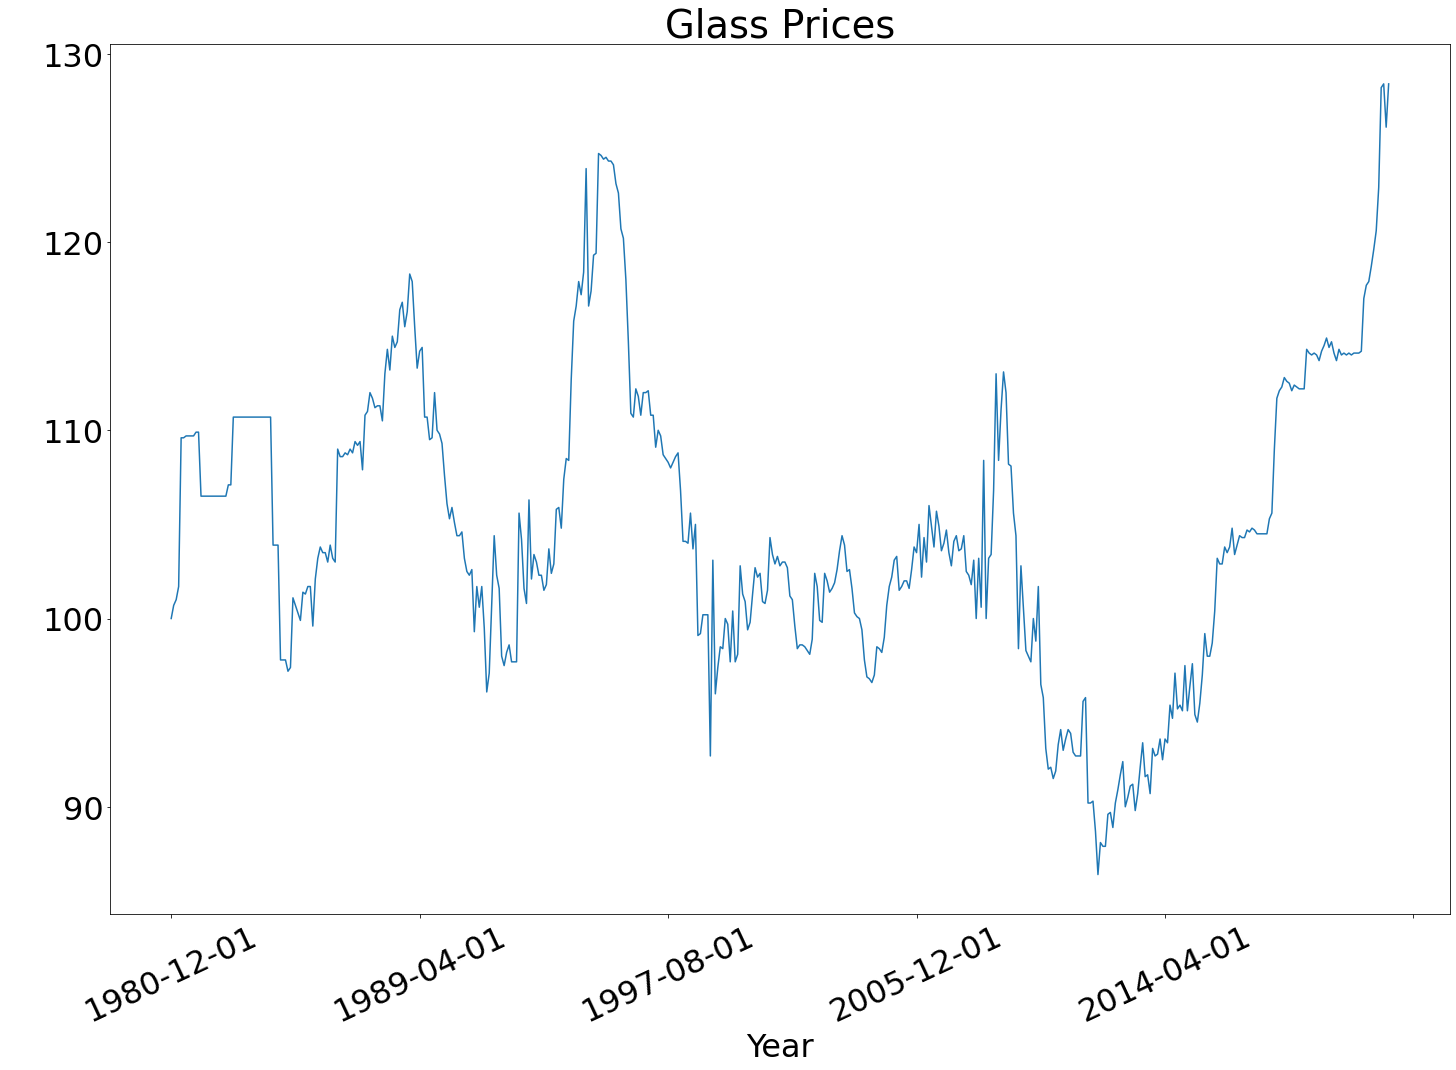

In [17]:
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
GlassData.plot.line(ax = ax, legend = False)
y_vals = ax.get_yticks()
plt.xlabel('Year')
plt.xticks(rotation = 25)
plt.ylabel(' ')
ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])    

plt.title("Glass Prices")
plt.show()
plt.close()

While we do see a bit of variation with glass prices, the price of glass is consistently between 85 dollars for a unit and 130 dollars for a unit of glass. The price has stayed relatively the same over the forty years that we have data for. Because the price has stayed within the same range for the period that we have data for, I suspect that the rate of change will look aboslutely nothing like the rate of changes for lumber and iron and steel data.

<ipython-input-18-18c4b829763b>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])


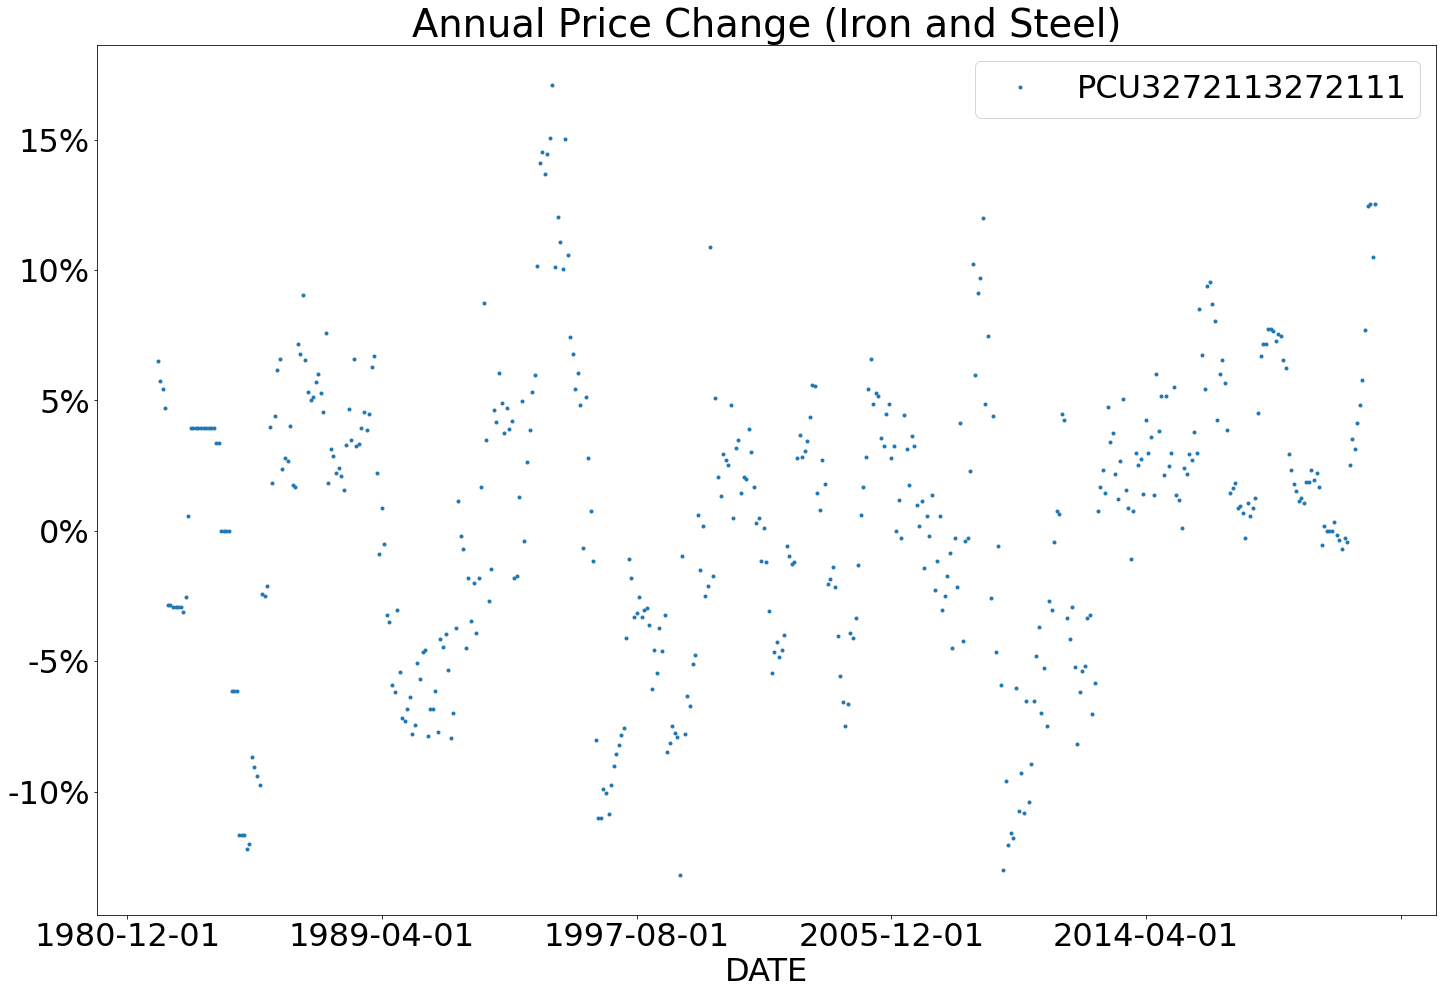

In [18]:
Glass_change_data = GlassData.pct_change(12) * 100 

plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
for key in Glass_change_data:
    Glass_change_data[key].plot.line(marker = ".", ls="", ax = ax)
plt.legend()
plt.title("Annual Price Change (Iron and Steel)")
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])    

plt.show()
plt.close()

And I was correct with that suspection. With lumber and iron and steel prices, we saw record highs in the raw prices and in the rates of change. We also saw that the high points for the rates of change were lately, unlike with glass. With glass, the high point for the rate of change happened in the 1990's. While yes, the price is still increasing rather rapidly with glass, it's rising nowhere near as quickly as lumber or iron and steel prices.

# Other factors

Real GDP Per Capita is a good indicator of the United States' economic prosperity, as it is the average GDP per citizen of the United States. 

According to Housing Prices, Mortgage Interest Rates and the Rising Share of Capital Income in the United States by Gianni La Cava, published in July of 2016, which can be accessed by opening "Housing Prices La Cava" in my GitHub, 

"It is also possible to look at the prices and volumes of different types of housing in the United States.8 The national accounts indicate that, over the past 25 years, in nominal terms, the share of aggregate income going to owner-occupiers has risen by 1.9 percentage points and by 0.6 percentage points for landlords. In real terms, the share of aggregate income going to owner occupiers has been unchanged since 1980 and it has actually fallen by 0.2 percentage points for landlords. The different real trends for owner-occupied and tenant-occupied housing suggest that factors such as an increase in the rate of home ownership and in the average quality of owner-occupied housing have played some role in explaining the secular rise of housing in recent decades. These differences are reflected in the national accounts estimates of housing investment – the rate of investment for owner-occupied housing has been at least three times as high as that for tenant  occupied housing over the past quarter of a century."

After reading this, I understood why we saw the rate of change that we did in my previous graph relating to housing prices in the first section of my project. This is because families are putting more money into their homes than ever before, causing prices to go up. Also, coupled with inflation, these factors have caused housing prices to jump to be extremely high. 

We will now look at Real GDP Per Capita to see if what La Cava published fits with the data we have collected from FRED.

In [19]:
RGDPPC_data=pd.read_csv('RGDPPC.csv',index_col='DATE')

<ipython-input-20-9987cfbf6e83>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])


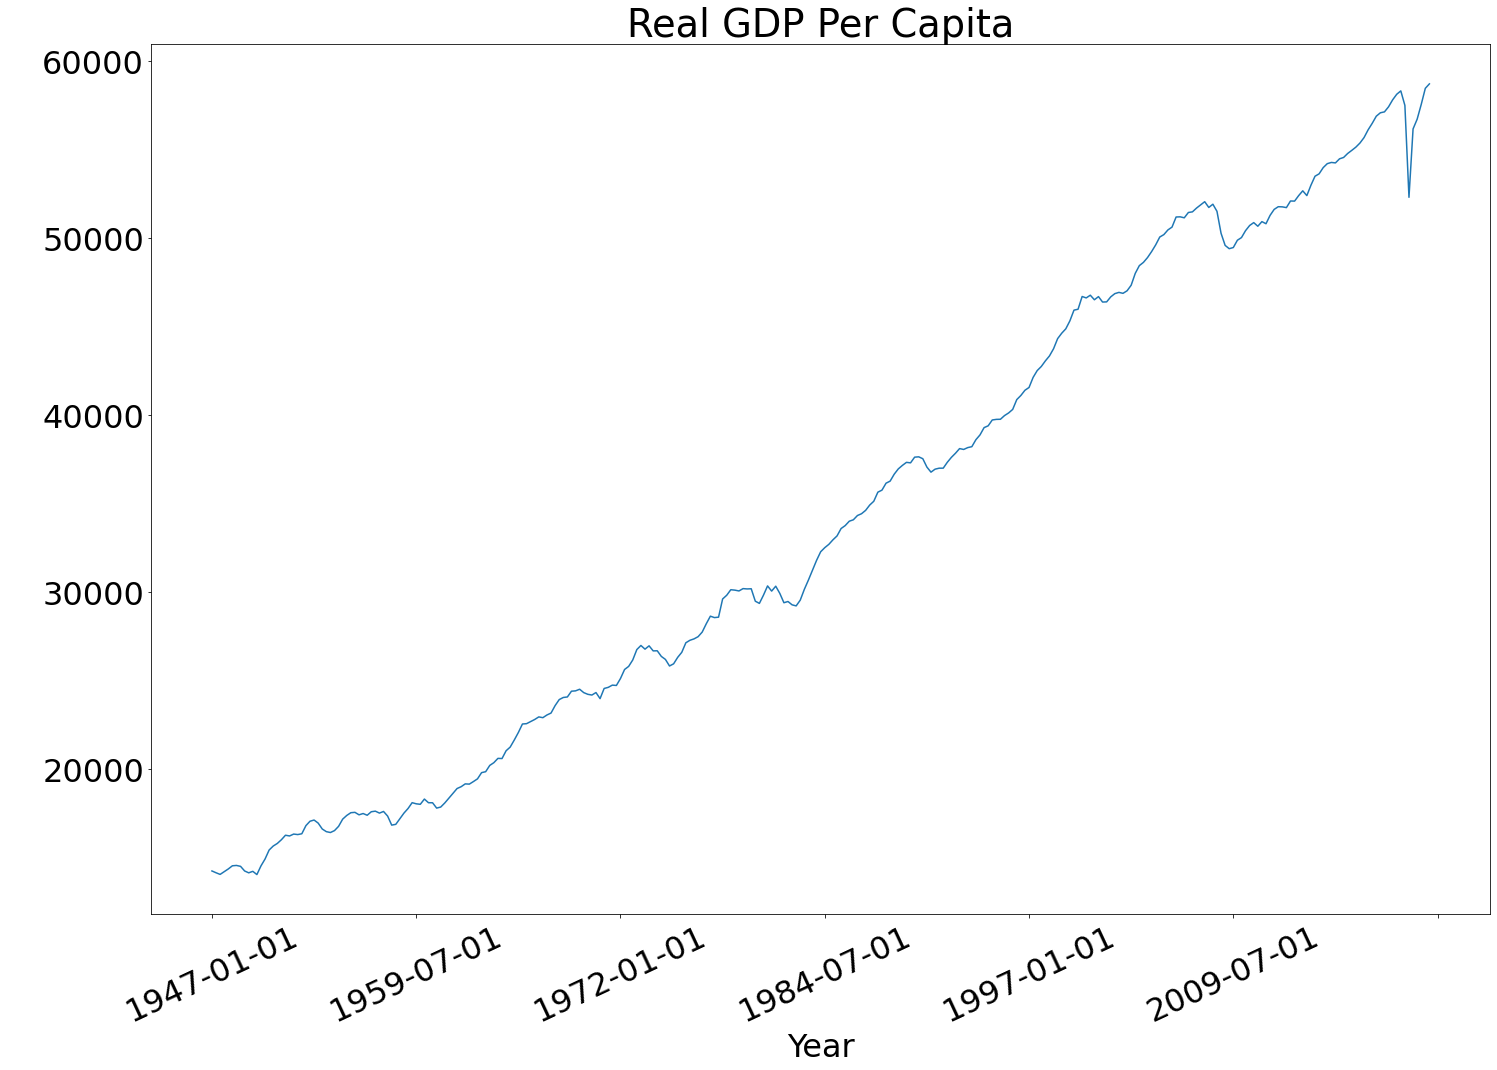

In [20]:
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
RGDPPC_data.plot.line(ax = ax, legend = False)
y_vals = ax.get_yticks()
plt.xlabel('Year')
plt.xticks(rotation = 25)
plt.ylabel(' ')
ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])    

plt.title("Real GDP Per Capita")
plt.show()
plt.close()

The excerpt from the article that La Cava published does fit, as Real GDP Per Capita has gone way up since the data was first collected in 1947. We can see that there was a major dip during the SARS 2 Coronavirus pandemic, but the economy has since recovered and Real GDP is at its highest level ever. However, we should still look at the rate of change for Real GDP Per Capita as it will give us an idea of how much it fluctuates on a quarterly basis.

In [21]:
RGDPPC_change_data = RGDPPC_data.pct_change(12) * 100

<ipython-input-22-de2504041926>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])


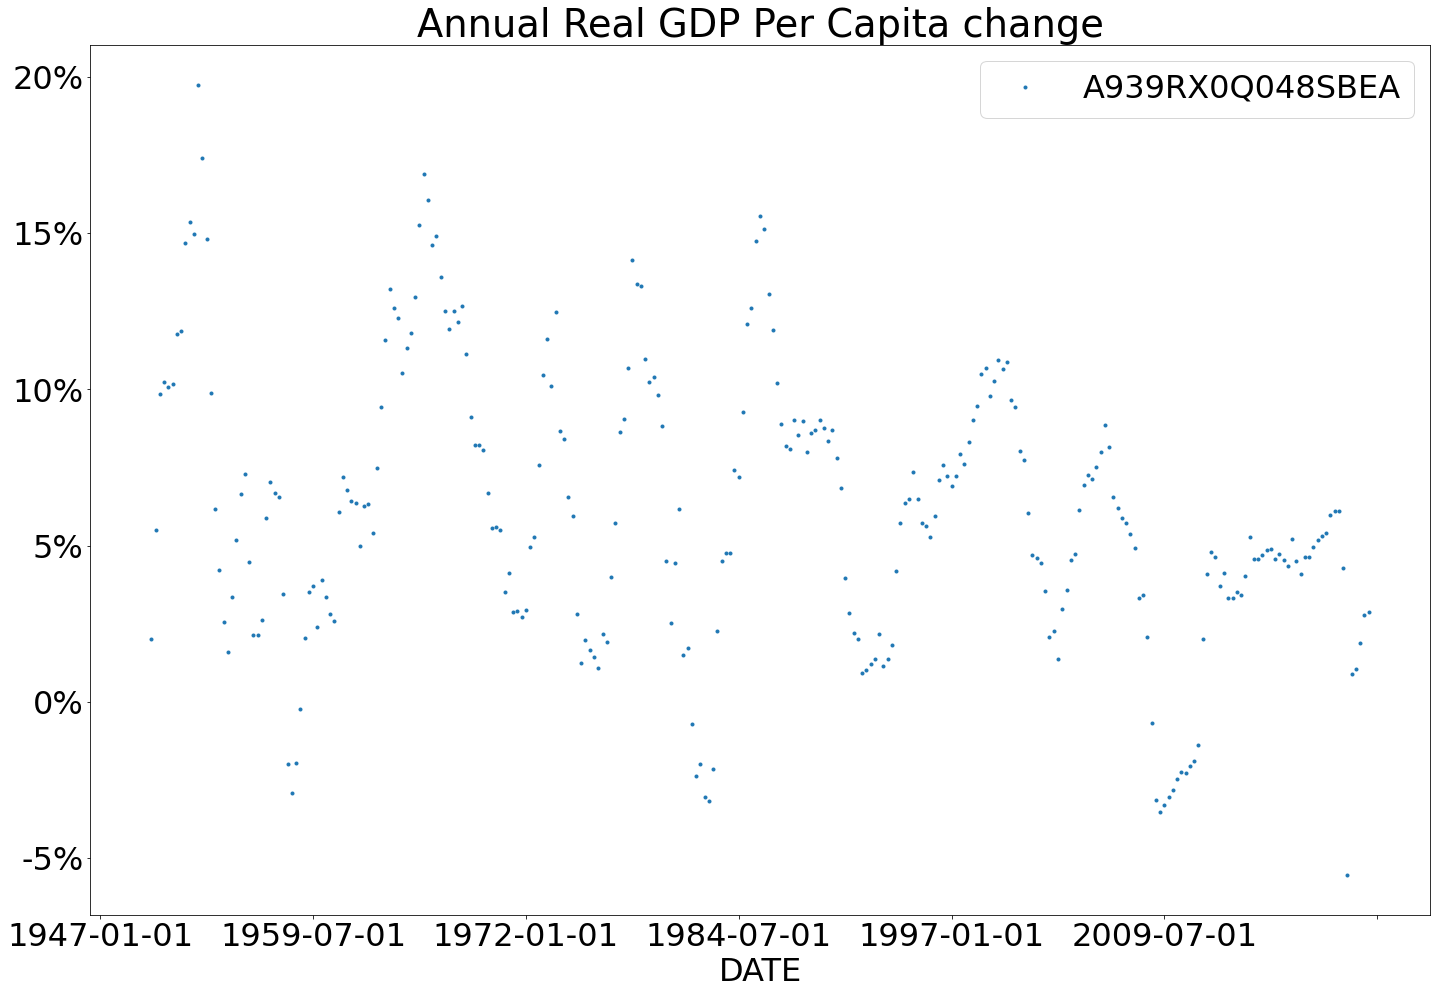

In [22]:
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
for key in RGDPPC_change_data:
    RGDPPC_change_data[key].plot.line(marker = ".", ls="", ax = ax)
plt.legend()
plt.title("Annual Real GDP Per Capita change")
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])    

plt.show()
plt.close()

We see a very similar distributuion with Real GDP Per Capita as we did with glass. While prices don't drastically change as much as we have seen with other samples that have upwards of a 300% increase or decreases, such as lumber, we do see that the distribution is around -5% change in a month to a positive change of around 20% in a month. We also see that Real GDP Per Capita is on the rise again, but is not at its highest rise ever; that happened in the 1950's. The rise we see today is meager; only around a 3% positive change per month.

We will now look at interest rates, as that's a pretty major factor in building or buying any home versus renting. Interest rates play a crucial role because, when interest rates are high, saving is higher. However, when interest rates are low, saving is lower. 

In [23]:
Interest_data=pd.read_csv('Interest_Rates.csv',index_col='DATE')

<ipython-input-24-12b470adb6a1>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])


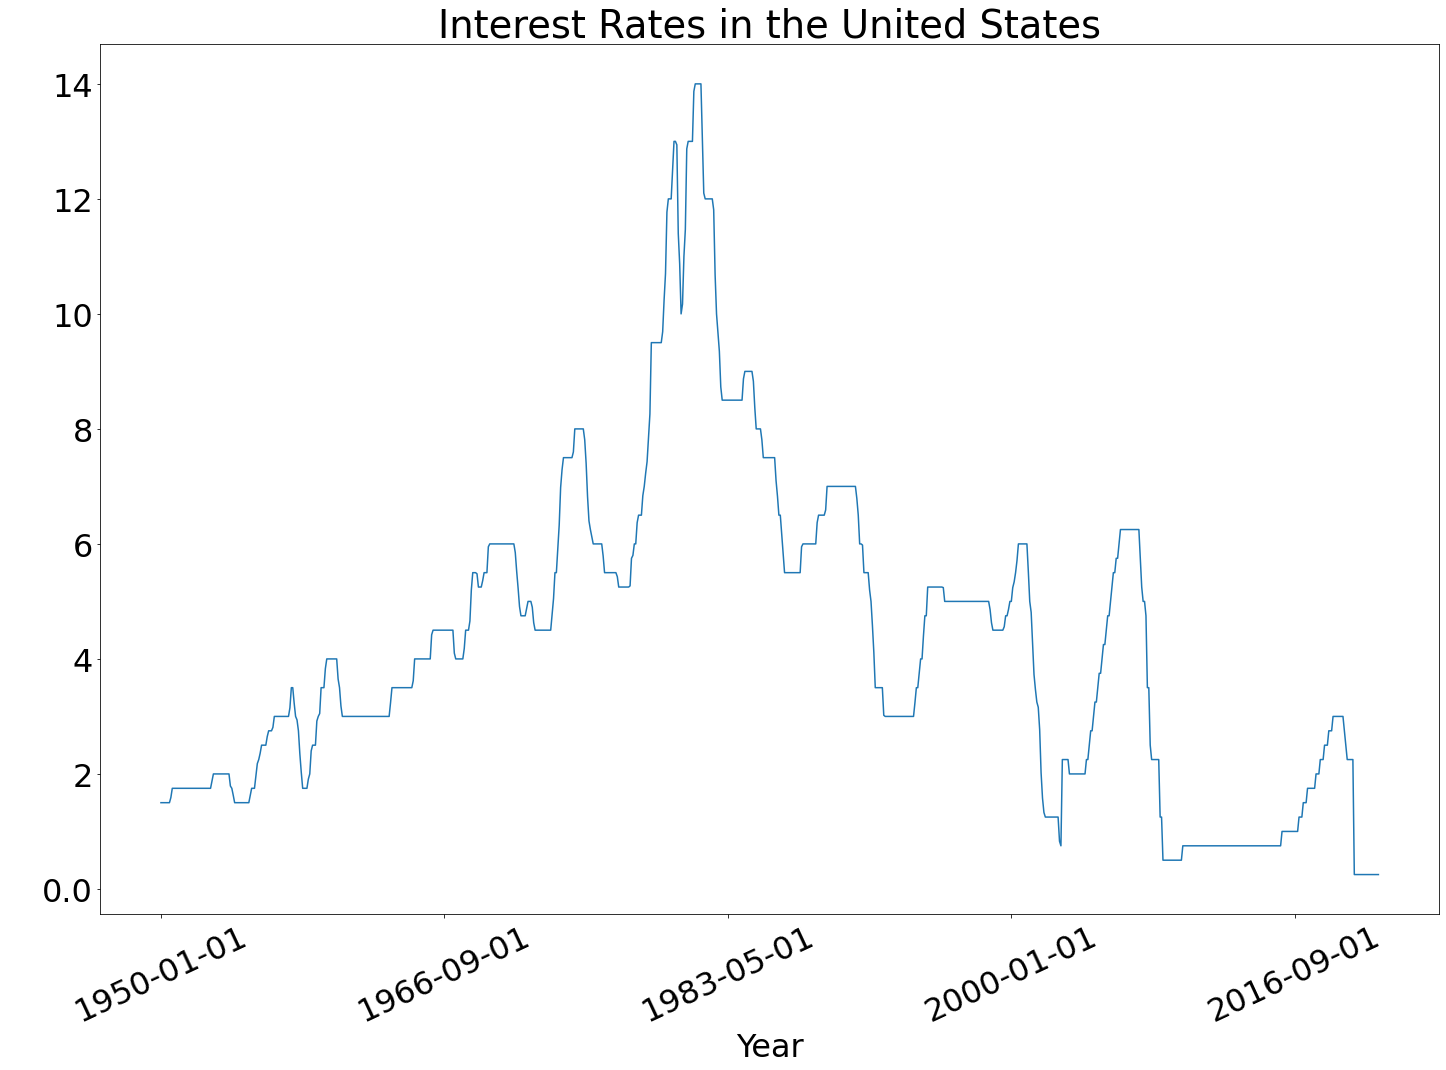

In [24]:
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
Interest_data.plot.line(ax = ax, legend = False)
y_vals = ax.get_yticks()
plt.xlabel('Year')
plt.xticks(rotation = 25)
plt.ylabel(' ')
ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])    

plt.title("Interest Rates in the United States")
plt.show()
plt.close()

Interest rates are set by the Federal Reserve with monetary policy. It's interesting that the highest interest rates were in the 1970's and 1980's to me. Today, however, interest rates are near zero to encourage spending due to the SARS 2 Coronavirus pandemic. We will not compute rate of change for the interest rates, as it is completely set by the Federal Reserve and does not fluctuate based on the market.

Another factor that many people would likely blame is inflation. 

According to an article written by Francesco Bianchi, Leonardo Melosi, and Matthias Rottner, titled "Hitting the elusive inflation target" (which can be accessed here: https://www.sciencedirect.com/science/article/pii/S0304393221001148 or as "Inflation Article 1" in my GitHub), the inflation target is 2%.

"The discount factor β is set to 0.9993 to obtain an annualized real interest rate of 1.5%, which is broadly in line with the estimates of Laubach and Williams (2003) for this period. The Rotemberg parameter φ is set to 10 0 0 so that the slope of the New Keynesian Phillips curve is 0.01. The calibrated value for the demand elasticity implies a steady-state markup of 10 percent. The parameter governing the degree of external consumption habits is set to 0.5. The inverse Frisch elasticity is set in line with Chetty et al. (2011) . The parameter controlling the disutility of labor χ is set to normalize the steady-state level of employment to unity. We set the inflation target to 2%"

When we set the inflation target to 2%, we hope that inflation hovers around there. We will import inflation data from FRED to see if inflation has been around 2%.

In [25]:
Inflation_data=pd.read_csv('T30YIEM.csv',index_col='DATE')
print(Inflation_data)

            T30YIEM
DATE               
2010-02-01     2.46
2010-03-01     2.49
2010-04-01     2.64
2010-05-01     2.46
2010-06-01     2.36
...             ...
2021-07-01     2.23
2021-08-01     2.23
2021-09-01     2.24
2021-10-01     2.35
2021-11-01     2.38

[142 rows x 1 columns]


<ipython-input-26-30f912e9e502>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])


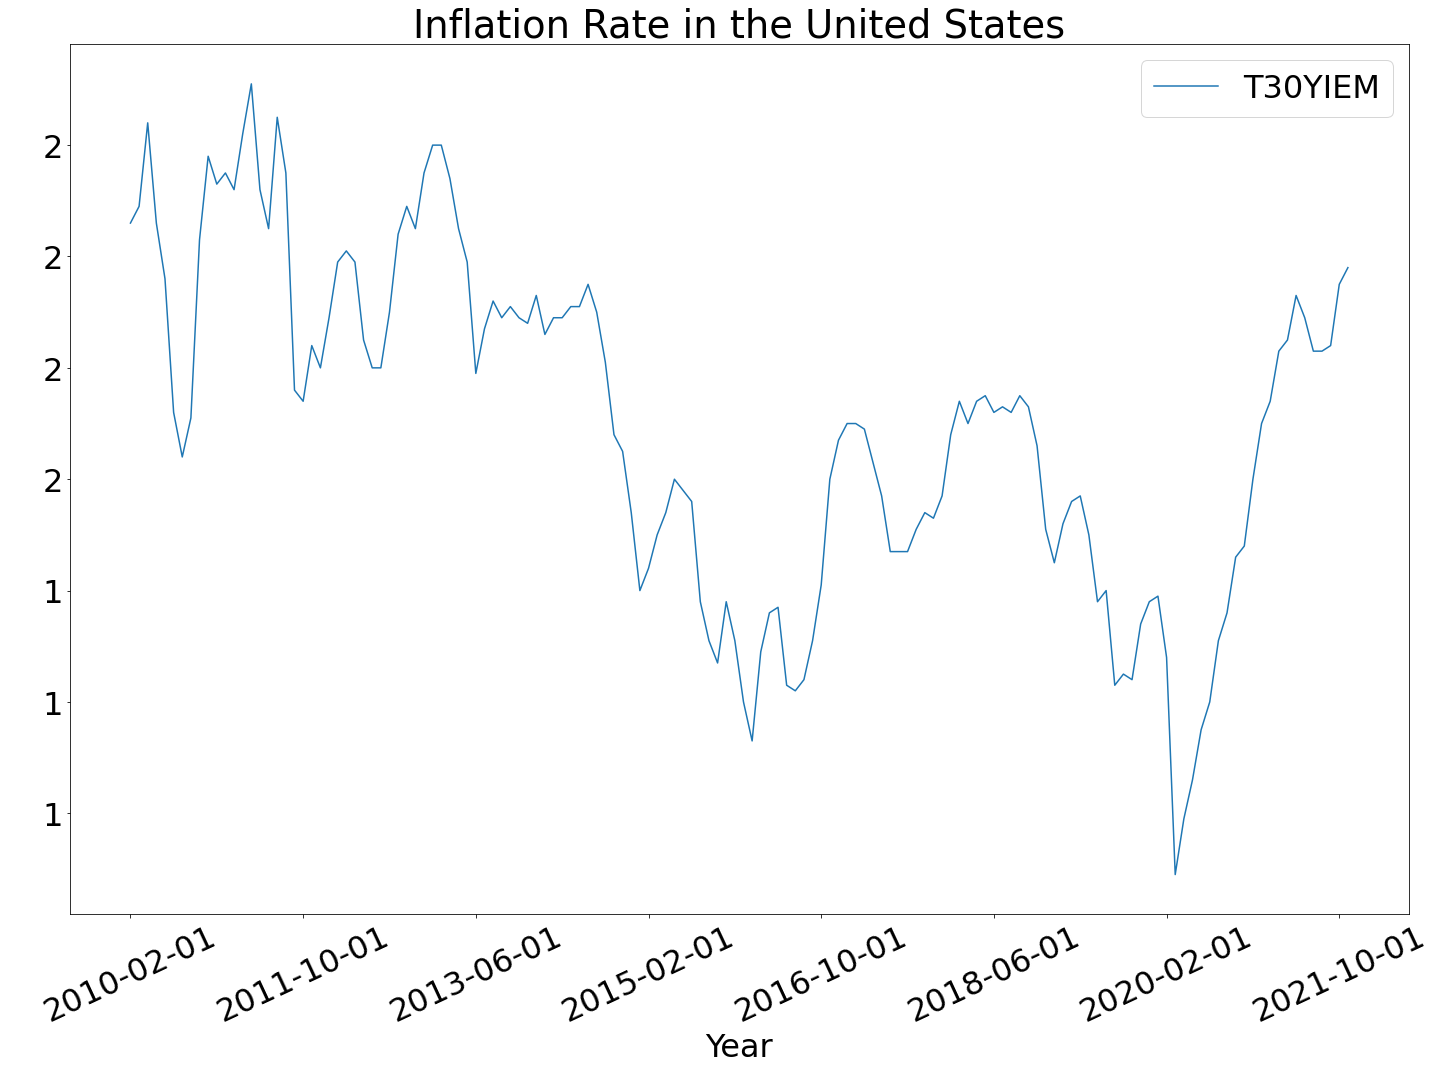

In [26]:
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
Inflation_data.plot.line(ax = ax)
y_vals = ax.get_yticks()
plt.xlabel('Year')
plt.xticks(rotation = 25)
plt.ylabel(' ')
ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])    

plt.title("Inflation Rate in the United States")
plt.show()
plt.close()

We can see that since 2010 inflation has fallen quite a bit, with it picking back up right at the start of the SARS 2 Coronavirus pandemic. However, inflation is not at its highest peak at the moment. That was in 2011. However, it is on the way back up there. Let's look at the rate of change and see if there's anything going on there that's interesting.

In [27]:
Inflation_change_data = Inflation_data.pct_change(12) * 100

<ipython-input-28-c788bb0a2ba8>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])


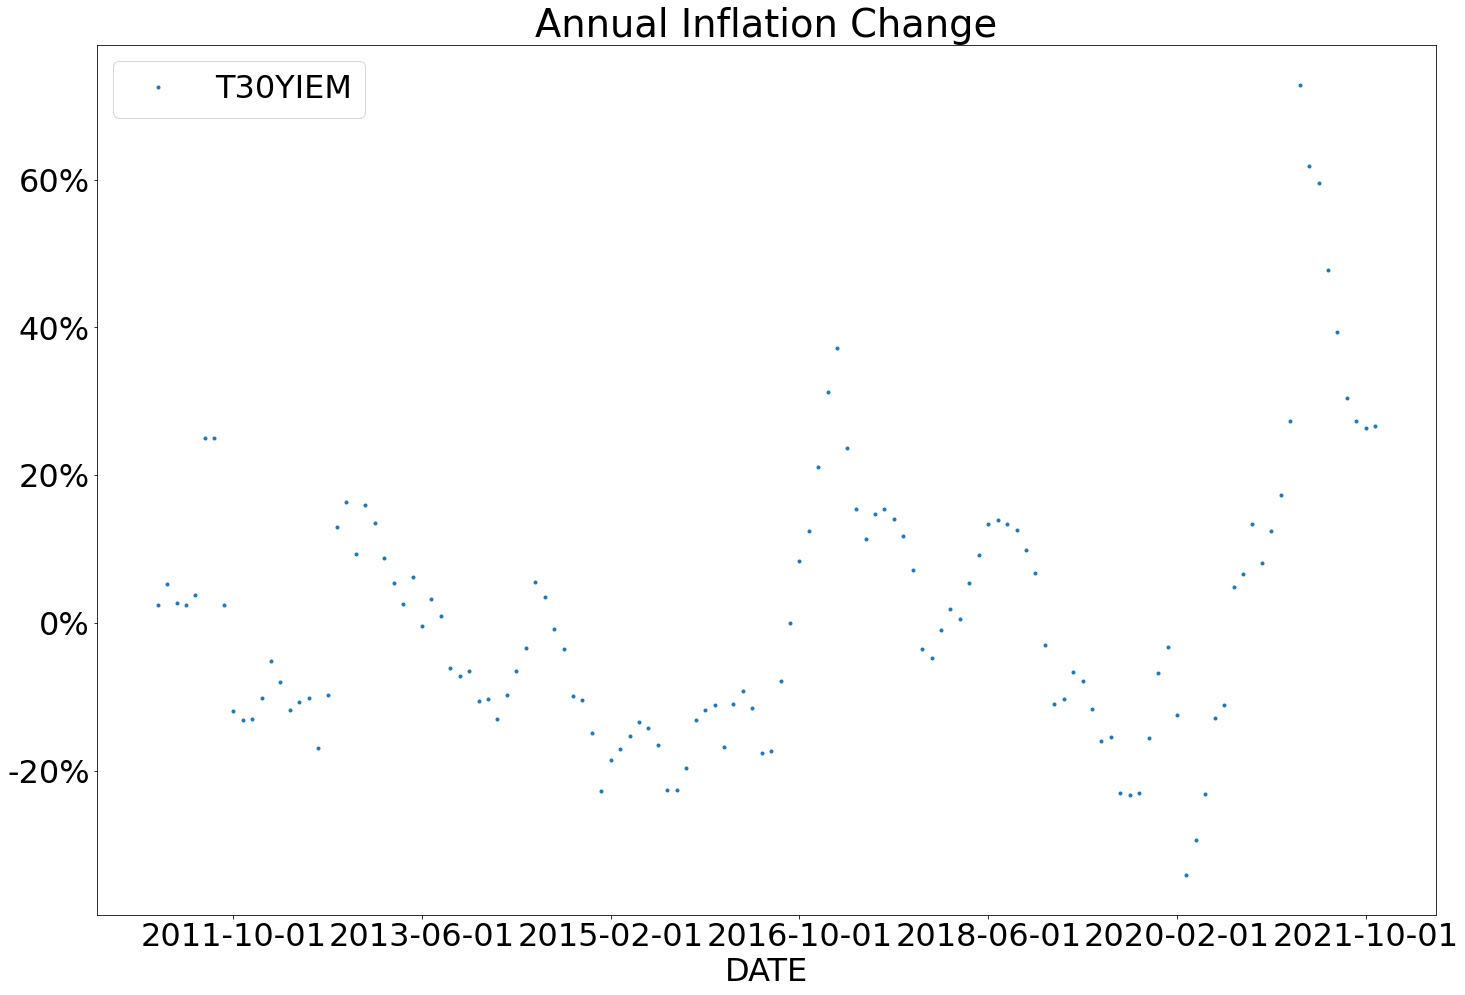

In [28]:
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
for key in Inflation_change_data:
    Inflation_change_data[key].plot.line(marker = ".", ls="", ax = ax)
plt.legend()
plt.title("Annual Inflation Change")
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])    

plt.show()
plt.close()

This is actually quite startling. We saw that inflation was at its highest rate (according to our limited data) in 2011. However, it was not increasing as much per month. We can see that during the COVID 19 pandemic, inflation's rate of change was a positive 60%. This is extremely startling, as inflation is a hidden tax on all Americans. 

We will also look at and examine the CPI as given to us by FRED. The CPI is the average change over time of a certain basket of goods and services compared to a base year. This will tell us if prices are rising in general in the United States, or if they are going down.

<ipython-input-29-2f87236c5441>:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])


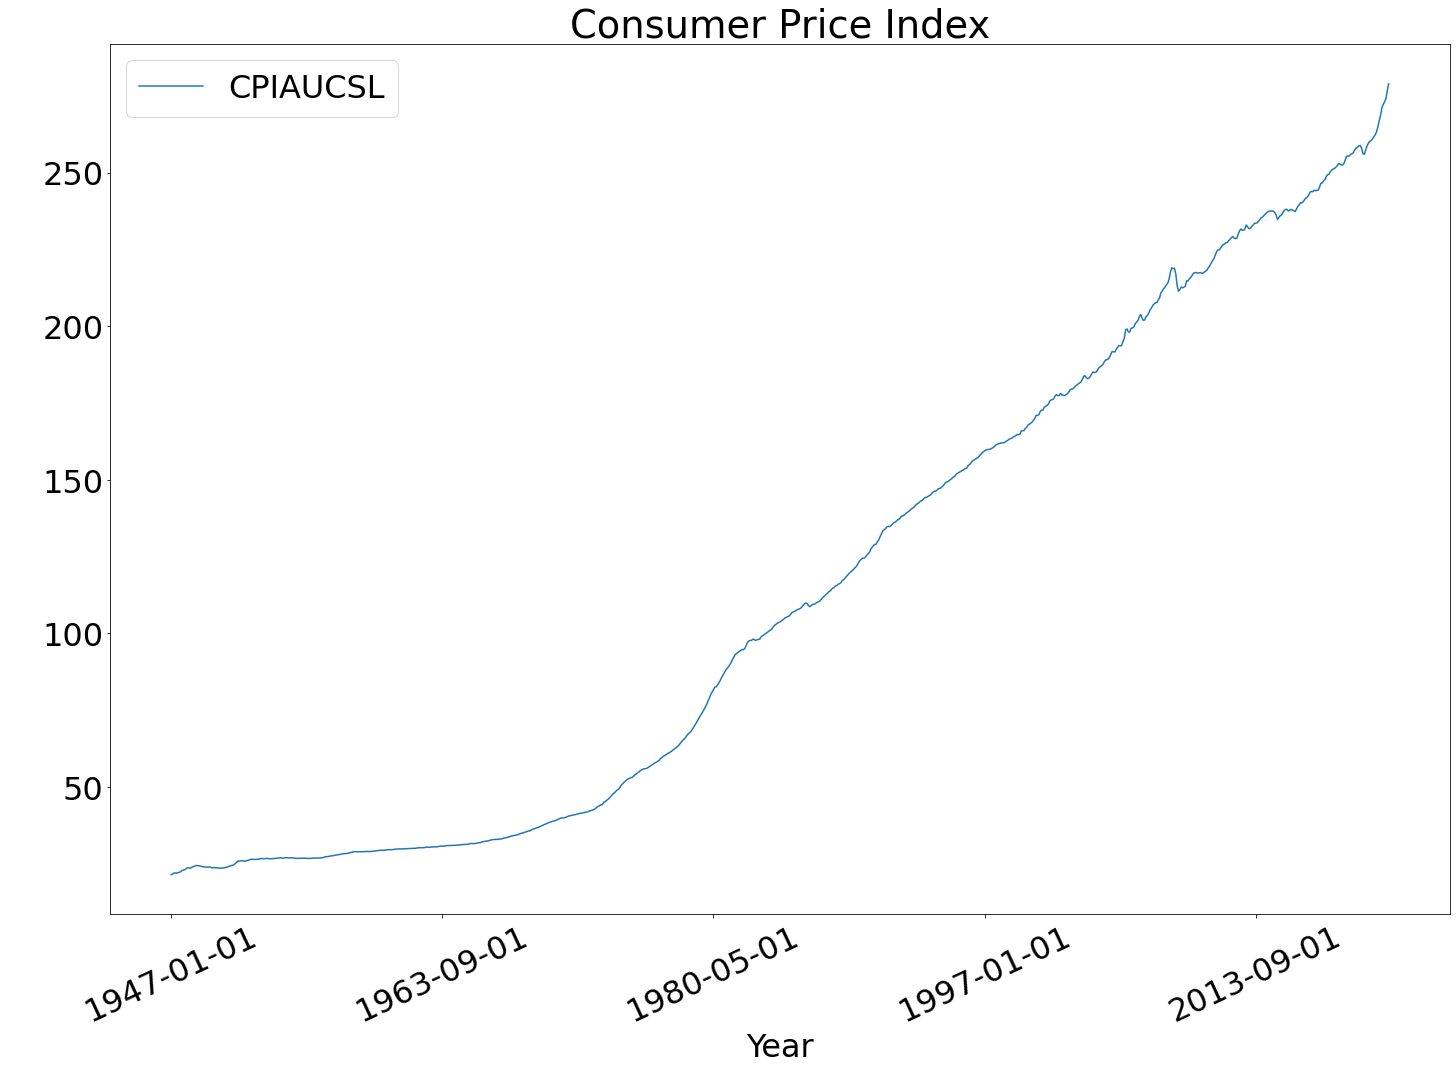

In [29]:
CPI_data=pd.read_csv('CPI.csv',index_col='DATE')

plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
CPI_data.plot.line(ax = ax)
y_vals = ax.get_yticks()
plt.xlabel('Year')
plt.xticks(rotation = 25)
plt.ylabel(' ')
ax.set_yticklabels([int(y) if y >= 1 else round(y,1) for y in y_vals])    

plt.title("Consumer Price Index")
plt.show()
plt.close()

With this graph, we can see that the CPI has increase steadily since 1947. However, it is hitting new highs in the most recently recorded data. Let's look at the rate of change of this to see if the CPI is increasing more than usual.

In [30]:
CPI_change_data = CPI_data.pct_change(12) * 100

<ipython-input-31-394f08542f46>:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])


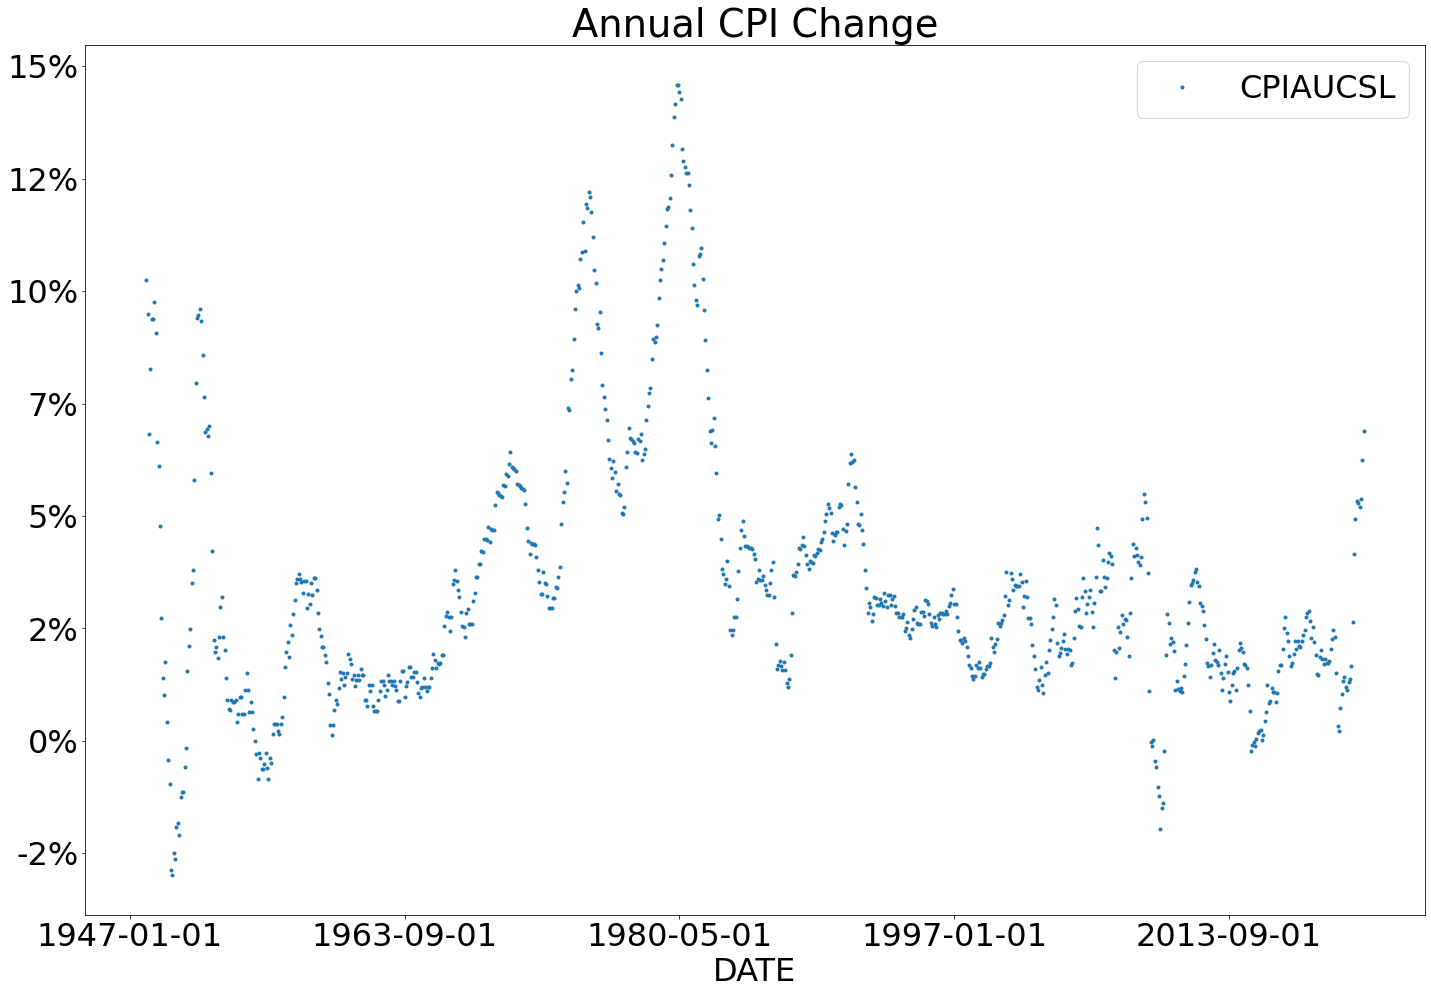

In [31]:
plt.rcParams.update({'font.size': 32})
fig, ax = plt.subplots(figsize = (24,16))
for key in CPI_change_data:
    CPI_change_data[key].plot.line(marker = ".", ls="", ax = ax)
plt.legend()
plt.title("Annual CPI Change")
y_vals = ax.get_yticks()
ax.set_yticklabels([str(int(y))+ "%" for y in y_vals])    

plt.show()
plt.close()

Here we can see that CPI does vary, but has varied a lot more in the 1980's instead of today. We still have a relatively high increase for CPI now; it's around 6.5%. However, in the 1980's, CPI was changing by almost 15%. This is a huge increase, and is tied to inflation. Like we learned earlier, the target rate for inflation is around 2%; some years we're higher than that (like we are now) and some years we're lower.

# Conclusion

In conclusion, the housing market is very volatile right now. While you can make money on real estate, I see it much more likely people that get into real estate now would lose money. However, I wasn't looking at this project from an investment standpoint; I was looking at this at a standpoint on whether you should purchase a house now, build a house now, or wait to do one or the other. With interest rates being low, promoting spending, now would seem like a decent time to purchase or build a house. However, you'd be paying an all time high price for that house. It depends on the consumer, and their wants and needs, but I would recommend that if you are looking to purchase a house, you wait. I can't tell you how long, as I don't want to attempt to predict the future with my data, but purchasing or building a house now likely is not the best option in the long run.